In [1]:
import math
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, geom, poisson, expon
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import chi2, chi2_contingency, chisquare
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import pearsonr, spearmanr, kendalltau
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv("delhivery_data.csv")
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# 1. Define Problem Statement and Perform EDA

## 1.1 Problem Statement

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

How can you help here?

The company wants to understand and process the data coming out of data engineering pipelines:
    - Clean, sanitize and manipulate data to get useful features out of raw fields
    - Make sense out of the raw data and help the data science team to build forecasting models on it

## 1.2 Observations on the Dataset

### Shape of data

In [3]:
df.shape

(144867, 24)

###  Data types of all the attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### Converting the relevant datetime columns to datetime datatype

In [5]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

### Dropping columns whose profile is unknown and that are deemed irrelavant to analysis

In [6]:
df.drop(["is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor", "segment_factor"], axis = 1, inplace = True)
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [7]:
df.shape # column count is reduced to 19 from 24 as 5 columns were dropped

(144867, 19)

### Missing value detection

In [8]:
missing_values = df.isna().sum()
print(f"Missing Values: \n\n{missing_values}")

Missing Values: 

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64


### Missing value treatment

In [9]:
print(f"Shape of the dataset before dropping the missing values: {df.shape}")
df = df.dropna()
print(f"Shape of the dataset before dropping the missing values: {df.shape}")

Shape of the dataset before dropping the missing values: (144867, 19)
Shape of the dataset before dropping the missing values: (144316, 19)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

### Outlier Detection

In [11]:
# iqr analysis is done on actual_distance_to_destination column

q1 = df["actual_distance_to_destination"].quantile(0.25)
q3 = df["actual_distance_to_destination"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df[(df["actual_distance_to_destination"] < lower_bound) | (df["actual_distance_to_destination"] > upper_bound)]

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Potential Outliers:\n\n {outliers}")

Lower Bound: -371.99887342249866
Upper Bound: 682.2701940854843
Potential Outliers:

             data         trip_creation_time   
402     training 2018-09-25 15:06:59.975279  \
403     training 2018-09-25 15:06:59.975279   
404     training 2018-09-25 15:06:59.975279   
405     training 2018-09-25 15:06:59.975279   
406     training 2018-09-25 15:06:59.975279   
...          ...                        ...   
144796      test 2018-10-01 18:17:37.047270   
144797      test 2018-10-01 18:17:37.047270   
144798      test 2018-10-01 18:17:37.047270   
144799      test 2018-10-01 18:17:37.047270   
144800      test 2018-10-01 18:17:37.047270   

                                      route_schedule_uuid route_type   
402     thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...        FTL  \
403     thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...        FTL   
404     thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...        FTL   
405     thanos::sroute:51d8aa58-9b5b-4bc2-81e9-bb284c6...    

Text(0.5, 1.0, 'Box plot of actual_distance_to_destination')

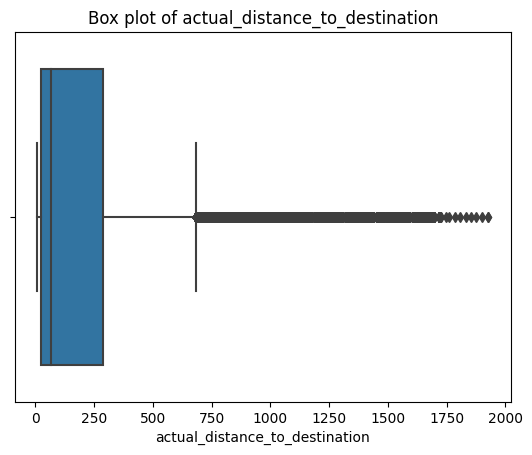

In [12]:
sns.boxplot(x = df["actual_distance_to_destination"], orient = "h")
plt.xlabel("actual_distance_to_destination")
plt.title("Box plot of actual_distance_to_destination")

### Outliers treatment

In [13]:
df = df[(df["actual_distance_to_destination"] >= lower_bound) & (df["actual_distance_to_destination"] <= upper_bound)]
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [14]:
df.shape

(126498, 19)

### Statistical summary of all the columns

In [15]:
df.describe(include = "all")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,126498,126498,126498,126498,126498,126498,126498,126498,126498,126498,126498,126498.000000,126498.000000,126498.000000,126498.000000,126498.000000,126498.000000,126498.000000,126498.000000
unique,2,NaN,1497,2,14783,1496,1496,1466,1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,NaN,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153739454399603402,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,92130,NaN,854,81314,80,14911,14911,11053,11053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2018-09-22 11:40:17.968260608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22 16:14:36.072665344,2018-09-23 04:21:51.149835520,726.755585,122.656868,227.364093,114.985976,149.280928,35.627899,17.958608,21.839753
min,NaN,2018-09-12 00:00:16.535741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,NaN,2018-09-17 01:58:29.248761088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-17 06:36:49.024604928,2018-09-17 21:43:36.352864,143.000000,22.574523,46.000000,25.000000,27.525650,18.000000,10.000000,11.336600
50%,NaN,2018-09-22 01:56:46.811814912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22 06:18:11.753445888,2018-09-22 21:58:07.828813056,343.000000,45.453759,102.000000,51.000000,58.817150,28.000000,17.000000,22.881350
75%,NaN,2018-09-27 15:38:12.231397120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-27 19:40:10.281134080,2018-09-28 06:38:25.754649088,957.000000,154.963620,293.750000,148.000000,192.399275,40.000000,22.000000,27.198300
max,NaN,2018-10-03 23:59:42.701692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,682.268233,3293.000000,693.000000,955.858400,2541.000000,469.000000,635.119600


### Statistical summary of only the numerical columns

In [16]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,126498,126498,126498,126498.000000,126498.000000,126498.000000,126498.000000,126498.000000,126498.000000,126498.000000,126498.000000
mean,2018-09-22 11:40:17.968260608,2018-09-22 16:14:36.072665344,2018-09-23 04:21:51.149835520,726.755585,122.656868,227.364093,114.985976,149.280928,35.627899,17.958608,21.839753
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 01:58:29.248761088,2018-09-17 06:36:49.024604928,2018-09-17 21:43:36.352864,143.000000,22.574523,46.000000,25.000000,27.525650,18.000000,10.000000,11.336600
50%,2018-09-22 01:56:46.811814912,2018-09-22 06:18:11.753445888,2018-09-22 21:58:07.828813056,343.000000,45.453759,102.000000,51.000000,58.817150,28.000000,17.000000,22.881350
75%,2018-09-27 15:38:12.231397120,2018-09-27 19:40:10.281134080,2018-09-28 06:38:25.754649088,957.000000,154.963620,293.750000,148.000000,192.399275,40.000000,22.000000,27.198300
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,682.268233,3293.000000,693.000000,955.858400,2541.000000,469.000000,635.119600
std,NaN,NaN,NaN,850.455460,157.252835,279.537000,139.757970,189.852956,53.572382,13.389478,15.486032


## 1.3 Graphical and Non-Graphical Analysis

### Graphical analysis

In [17]:
categorical_columns = df.select_dtypes(include = ["object"]).columns.tolist()
categorical_columns

['data',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name']

In [18]:
numerical_columns = df.select_dtypes(include = ["float"]).columns.tolist()
numerical_columns

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

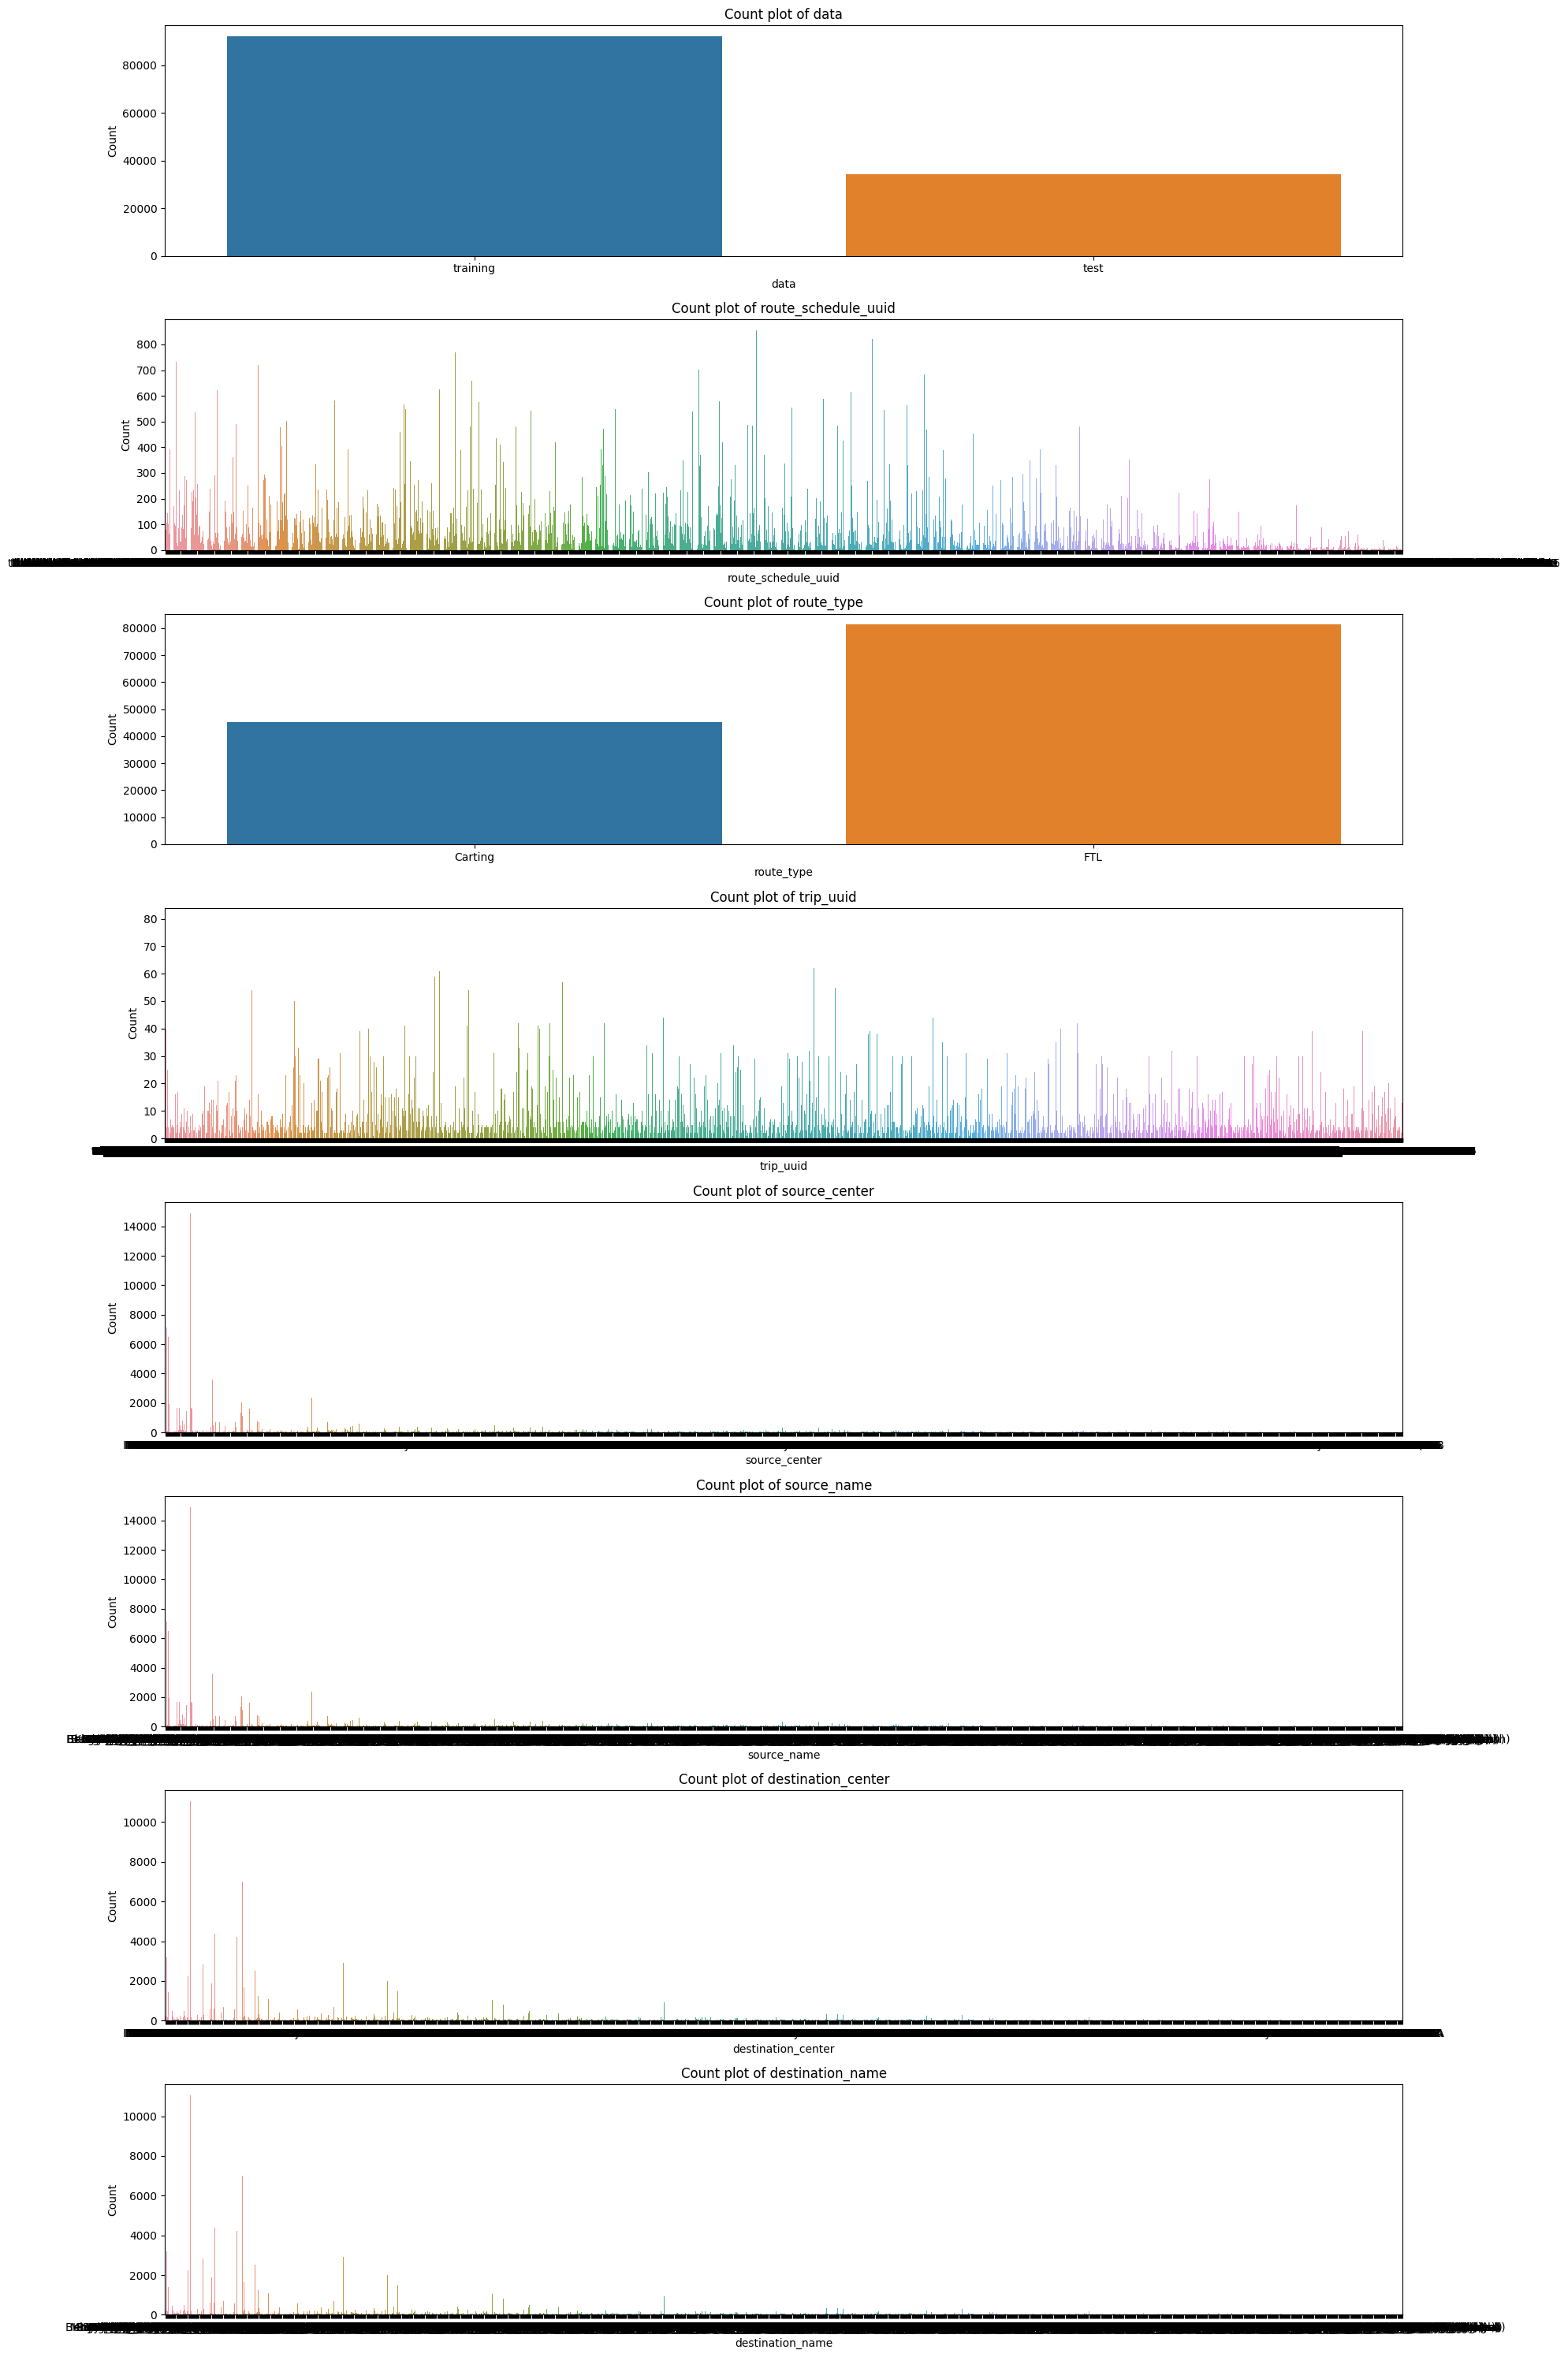

In [19]:
# count plot for all the categorical columns
plt.figure(figsize = (20, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(8, 1, i)
    sns.countplot(data = df, x = column)
    plt.title(f"Count plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

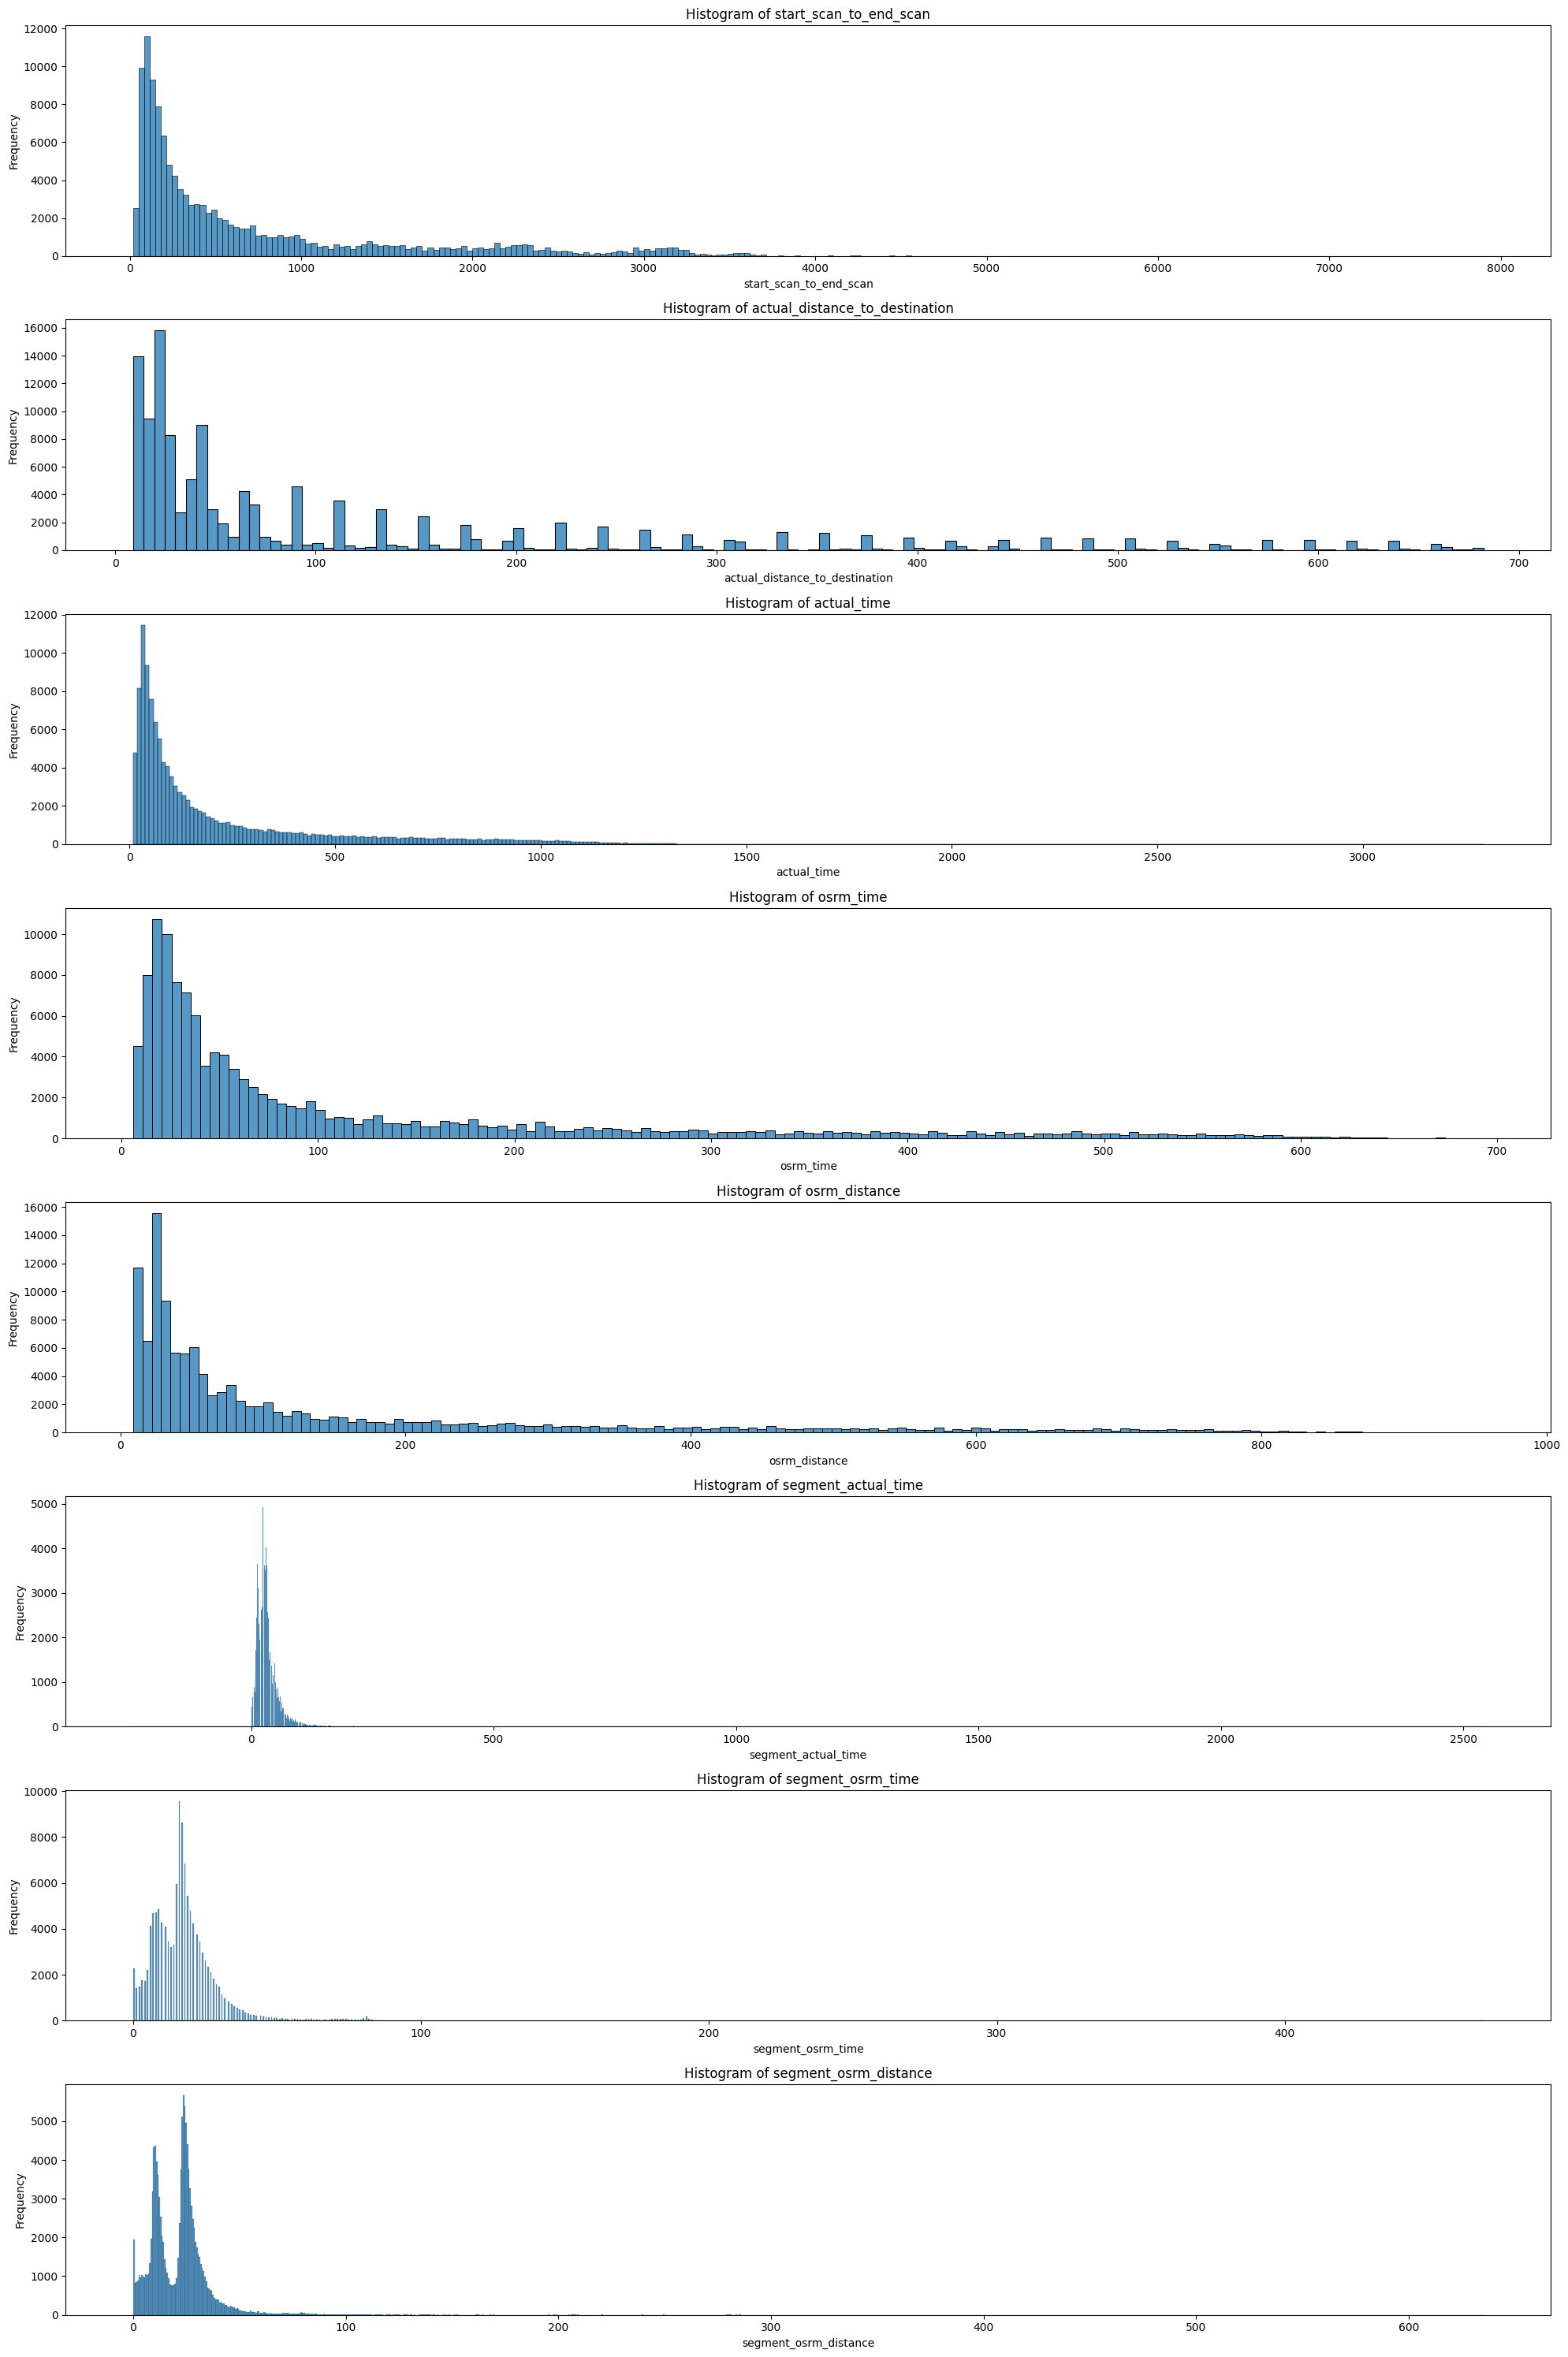

In [20]:
# histograms for all the numerical columns
plt.figure(figsize = (20, 30))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(8, 1, i)
    sns.histplot(data = df, x = column)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

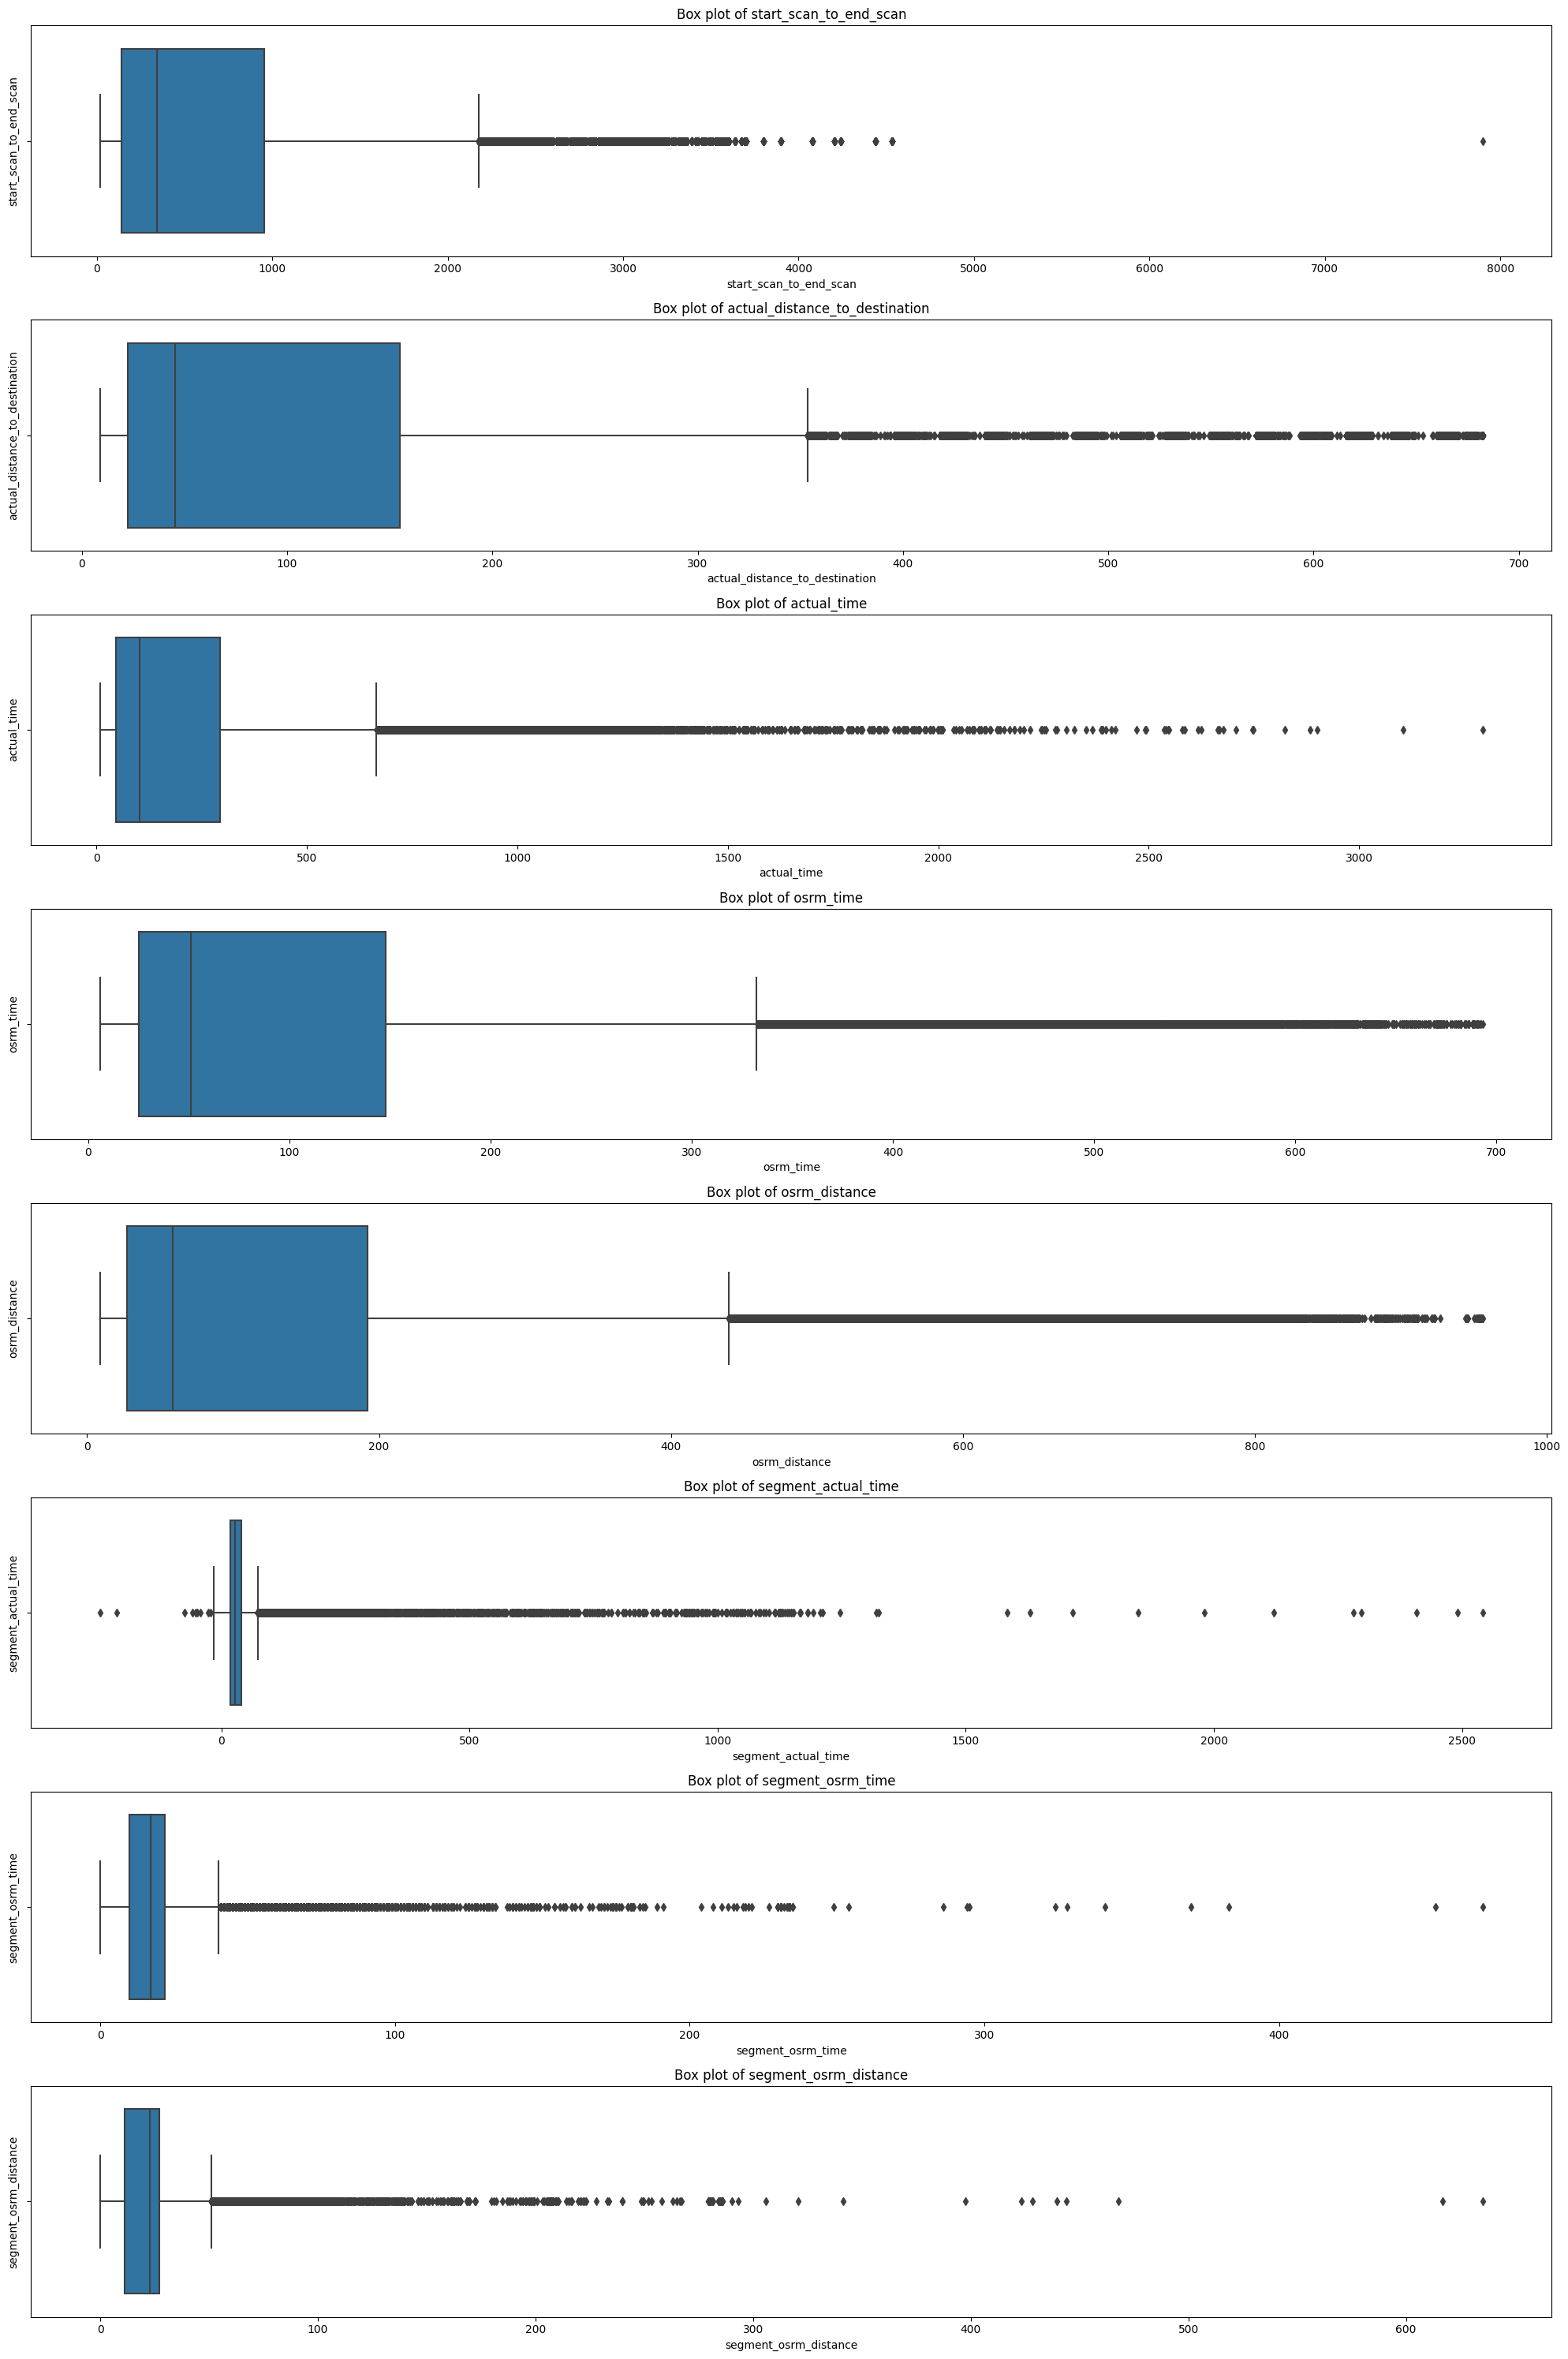

In [21]:
# boxplot for all the numerical columns
plt.figure(figsize = (20, 30))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(8, 1, i)
    sns.boxplot(data = df, x = column)
    plt.title(f"Box plot of {column}")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

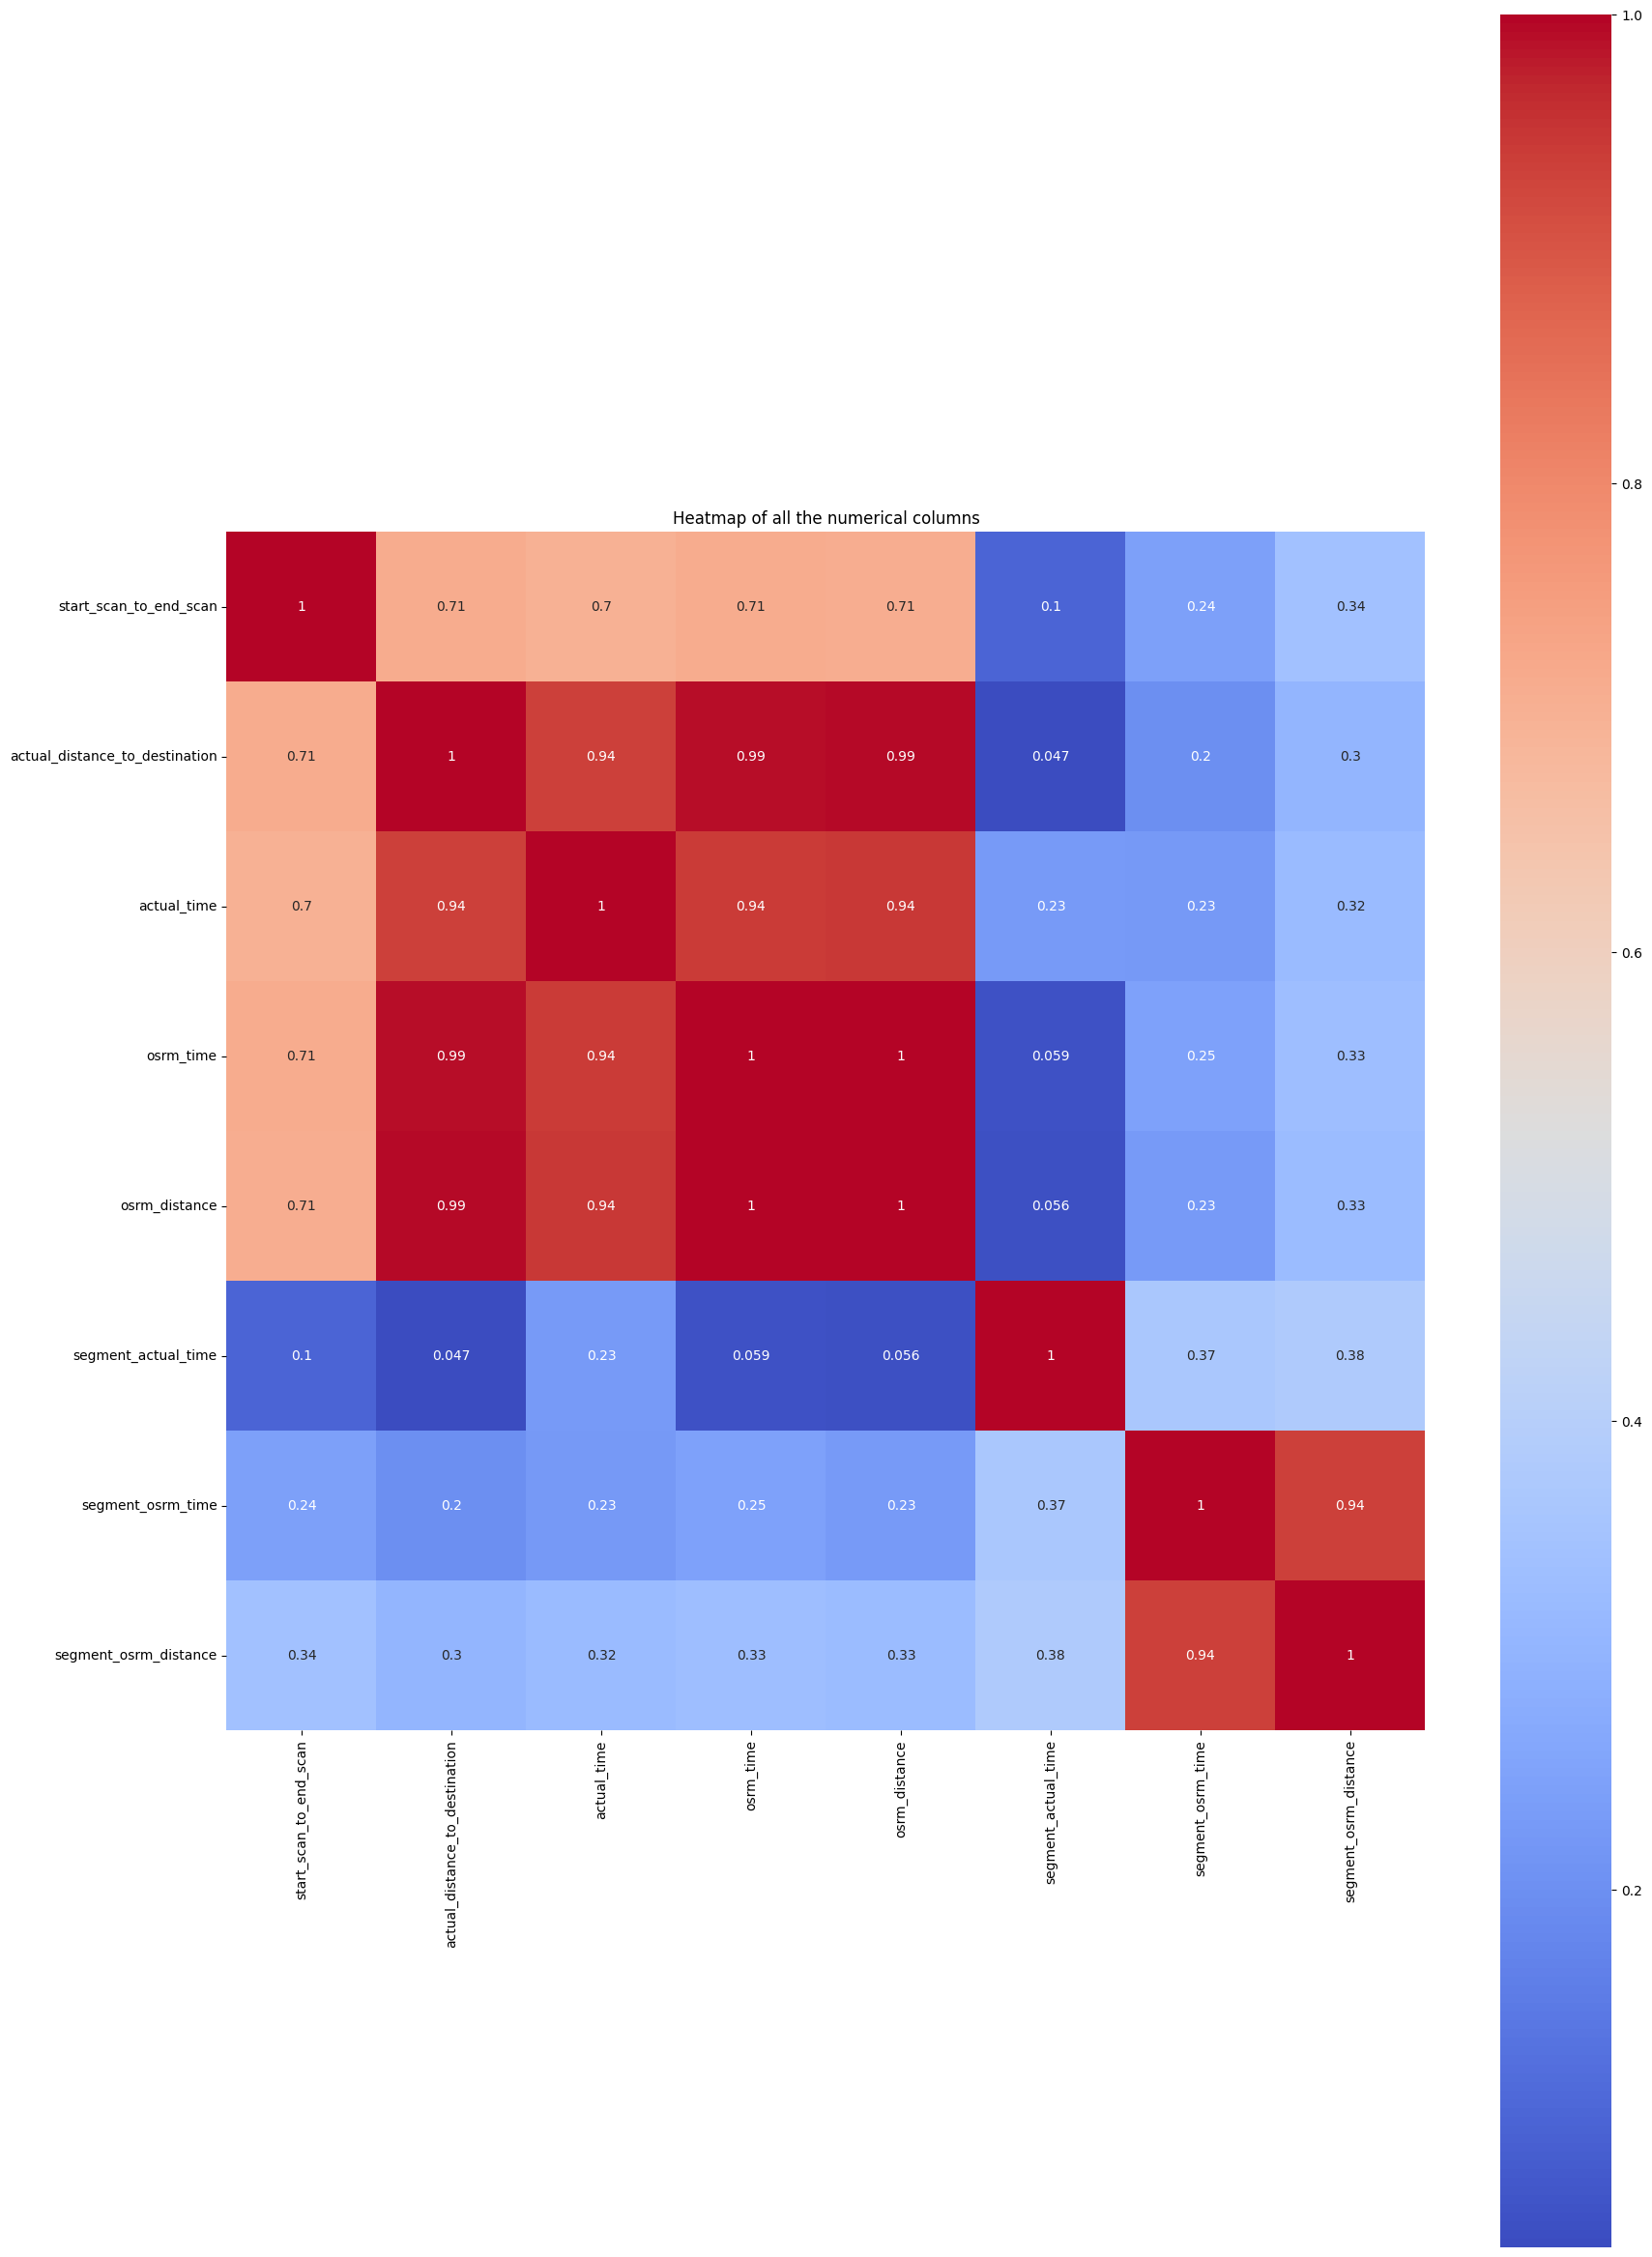

In [22]:
# heatmap for all the numerical columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize = (20, 30))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", square = True)
plt.title("Heatmap of all the numerical columns")
plt.show()

<Figure size 2000x3000 with 0 Axes>

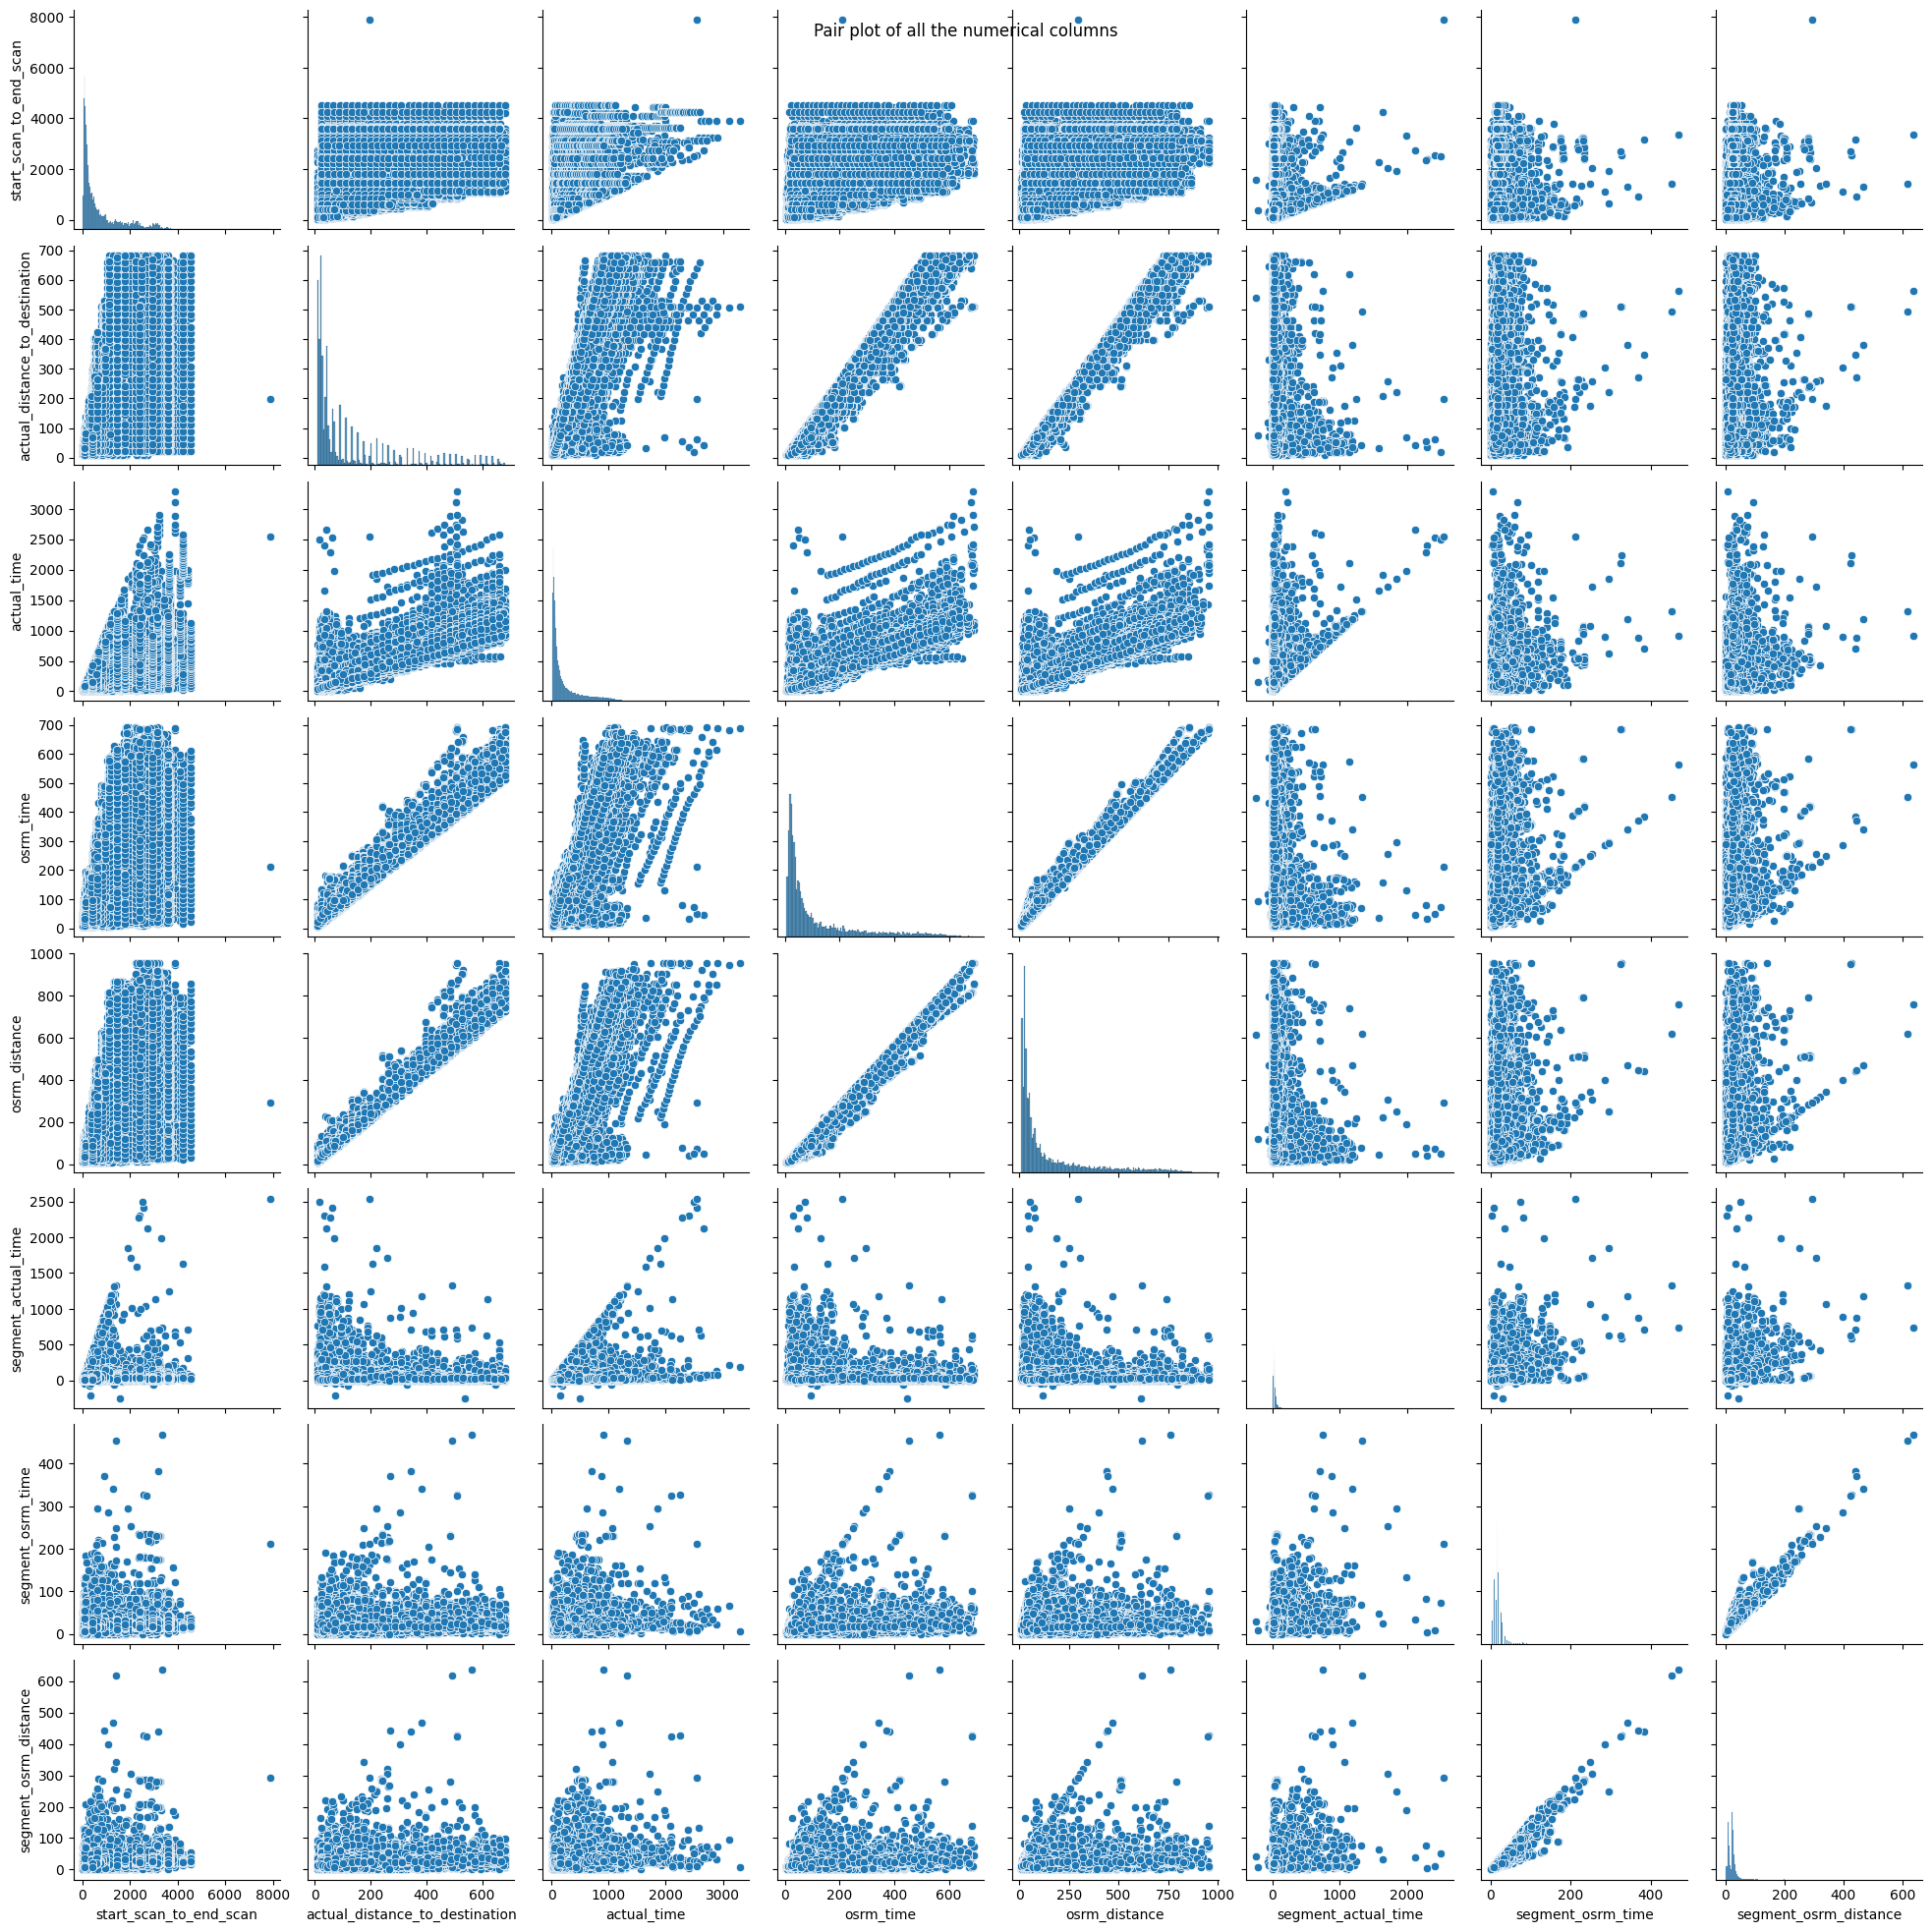

In [23]:
# pair plot of all the numerical columns
plt.figure(figsize = (20, 30))
sns.pairplot(df[numerical_columns])
plt.suptitle("Pair plot of all the numerical columns")
plt.show()

### Non-graphical analysis

In [24]:
print(f"The dataset contains information on {df['data'].nunique()} different types of data.")
print(f"The following are the different types of data: {df['data'].unique()}")

The dataset contains information on 2 different types of data.
The following are the different types of data: ['training' 'test']


In [25]:
print(f"There are {df['route_type'].nunique()} types of transportation used.")
print(f"The different types of transportation used are: {df['route_type'].unique()}")

There are 2 types of transportation used.
The different types of transportation used are: ['Carting' 'FTL']


In [26]:
print(f"There are {df['source_name'].nunique()} number of sources from where a pickup was made.")
print(f"The different sources from where a pickup was made are: {df['source_name'].unique()}")

There are 1496 number of sources from where a pickup was made.
The different sources from where a pickup was made are: ['Anand_VUNagar_DC (Gujarat)' 'Khambhat_MotvdDPP_D (Gujarat)'
 'Bhiwandi_Mankoli_HB (Maharashtra)' ... 'Dwarka_StnRoad_DC (Gujarat)'
 'Bengaluru_Nelmngla_L (Karnataka)' 'Kulithalai_AnnaNGR_D (Tamil Nadu)']


In [27]:
print(f"There are {df['destination_name'].nunique()} number of destination where a package was delivered.")
print(f"The following are the destinations where a dropoff was made: {df['destination_name'].unique()}")

There are 1466 number of destination where a package was delivered.
The following are the destinations where a dropoff was made: ['Khambhat_MotvdDPP_D (Gujarat)' 'Anand_Vaghasi_IP (Gujarat)'
 'Pune_Tathawde_H (Maharashtra)' ... 'Chennai_Mylapore (Tamil Nadu)'
 'Naraingarh_Ward2DPP_D (Haryana)' 'Mumbai_Ghansoli_DC (Maharashtra)']


In [28]:
print(f"The average time comsumed to deliver a package = {df['start_scan_to_end_scan'].unique().sum()/ df['start_scan_to_end_scan'].nunique()}")
print(f"The total time consumed while delivering packages = {df['start_scan_to_end_scan'].unique().sum()}")

The average time comsumed to deliver a package = 1242.771727748691
The total time consumed while delivering packages = 2373694.0


In [29]:
print(f"The total actual distance travelled while delivering packages = {df['actual_distance_to_destination'].sum()}")
print(f"The total predicted distance travelled while delivering packages = {df['osrm_distance'].sum()}")

The total actual distance travelled while delivering packages = 15515848.458613653
The total predicted distance travelled while delivering packages = 18883738.844699997


## 1.4 Insights based on EDA

### Comments on range of attributes

### Comments on the distribution of variables and relationship between them

### Comments for each univariate and bivariate plot

# 2. Feature Creation

## 2.1 Destination Name and State

In [30]:
df["destination_city"] = df["destination_name"].str.split("_").str[0]
df["destination_state"] = df["destination_name"].str.extract("\((.*?)\)")
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,destination_city,destination_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,Khambhat,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,Khambhat,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,Khambhat,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,Khambhat,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,Khambhat,Gujarat


## 2.2 Source name and state

In [31]:
df["source_city"] = df["source_name"].str.split("_").str[0]
df["source_state"] = df["source_name"].str.extract("\((.*?)\)")
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,destination_city,destination_state,source_city,source_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,14.0,11.0,11.9653,Khambhat,Gujarat,Anand,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,10.0,9.0,9.7590,Khambhat,Gujarat,Anand,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,16.0,7.0,10.8152,Khambhat,Gujarat,Anand,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,21.0,12.0,13.0224,Khambhat,Gujarat,Anand,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,6.0,5.0,3.9153,Khambhat,Gujarat,Anand,Gujarat


## 2.3 Trip Creation Time

In [32]:
df["trip_creation_year"] = df["trip_creation_time"].dt.year
df["trip_creation_month"] = df["trip_creation_time"].dt.month
df["trip_creation_day"] = df["trip_creation_time"].dt.day
df["trip_creation_hour"] = df["trip_creation_time"].dt.hour
df["trip_creation_minute"] = df["trip_creation_time"].dt.minute
df["trip_creation_second"] = df["trip_creation_time"].dt.second
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_city,destination_state,source_city,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat,Gujarat,Anand,Gujarat,2018,9,20,2,35,36
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat,Gujarat,Anand,Gujarat,2018,9,20,2,35,36
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat,Gujarat,Anand,Gujarat,2018,9,20,2,35,36
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat,Gujarat,Anand,Gujarat,2018,9,20,2,35,36
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat,Gujarat,Anand,Gujarat,2018,9,20,2,35,36


## 2.4 Other Additionally Required Features

In [33]:
df["time_taken_between_od_start_end"] = (df["od_end_time"] - df["od_start_time"]).dt.total_seconds()
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_state,source_city,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second,time_taken_between_od_start_end
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,Gujarat,2018,9,20,2,35,36,5172.818197
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,Gujarat,2018,9,20,2,35,36,5172.818197
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,Gujarat,2018,9,20,2,35,36,5172.818197
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,Gujarat,2018,9,20,2,35,36,5172.818197
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Gujarat,Anand,Gujarat,2018,9,20,2,35,36,5172.818197


# 3. Merging of Rows and Aggregation of Fields

In [34]:
df = df.sort_values(by = ["trip_uuid", "od_start_time"])
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_state,source_city,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second,time_taken_between_od_start_end
124981,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,Uttar Pradesh,Bhopal,Madhya Pradesh,2018,9,12,0,0,16,59970.322728
124982,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,Uttar Pradesh,Bhopal,Madhya Pradesh,2018,9,12,0,0,16,59970.322728
124983,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,Uttar Pradesh,Bhopal,Madhya Pradesh,2018,9,12,0,0,16,59970.322728
124984,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,Uttar Pradesh,Bhopal,Madhya Pradesh,2018,9,12,0,0,16,59970.322728
124985,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,Uttar Pradesh,Bhopal,Madhya Pradesh,2018,9,12,0,0,16,59970.322728


In [35]:
df_merged = df.groupby("trip_uuid").agg({
    "data": "first",
    "trip_creation_time": "first",
    "route_schedule_uuid": "first",
    "route_type": "first",
    "source_center": "first",
    "source_name": "first",
    "destination_center": "first",
    "destination_name": "first",
    "od_start_time": "min",
    "od_end_time": "max",
    "start_scan_to_end_scan": "sum",
    "actual_distance_to_destination": "sum",
    "actual_time": "sum",
    "osrm_time": "sum",
    "osrm_distance": "sum",
    "segment_actual_time": "sum",
    "segment_osrm_time": "sum",
    "segment_osrm_distance": "sum",
    "destination_city": "first",
    "destination_state": "first",
    "source_city": "first",
    "source_state": "first",
    "trip_creation_year": "first",
    "trip_creation_month": "first",
    "trip_creation_day": "first",
    "trip_creation_hour": "first",
    "trip_creation_minute": "first",
    "trip_creation_second": "first",
    "time_taken_between_od_start_end": "sum"
}).reset_index()
df_merged.head(10)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_state,source_city,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second,time_taken_between_od_start_end
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,Uttar Pradesh,Bhopal,Madhya Pradesh,2018,9,12,0,0,16,2.620830e+06
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,Karnataka,Tumkur,Karnataka,2018,9,12,0,0,22,5.479044e+04
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,...,Haryana,Bangalore,Karnataka,2018,9,12,0,0,33,6.180442e+06
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,Maharashtra,Mumbai Hub (Maharashtra),Maharashtra,2018,9,12,0,1,0,1.205939e+04
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 00:02:09.740725,...,Karnataka,Bellary,Karnataka,2018,9,12,0,2,9,9.532266e+04
5,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 00:02:34.161600,...,Tamil Nadu,Chennai,Tamil Nadu,2018,9,12,0,2,34,1.508195e+04
6,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,...,Tamil Nadu,Chennai,Tamil Nadu,2018,9,12,0,4,22,5.880338e+03
7,trip-153671066826362165,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,IND560043AAC,HBR Layout PC (Karnataka),IND560064AAA,Bengaluru_NwYlhnka_DC (Karnataka),2018-09-12 00:04:28.263977,...,Karnataka,HBR Layout PC (Karnataka),Karnataka,2018,9,12,0,4,28,1.762061e+04
8,trip-153671074033284934,training,2018-09-12 00:05:40.333071,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,IND395023AAD,Surat_Central_I_4 (Gujarat),IND395004AAB,Surat_Central_D_3 (Gujarat),2018-09-12 00:05:40.333071,...,Gujarat,Surat,Gujarat,2018,9,12,0,5,40,3.370128e+04
9,trip-153671079956500691,training,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,Delhi_Bhogal (Delhi),2018-09-12 00:06:39.565253,...,Delhi,Delhi,Delhi,2018,9,12,0,6,39,5.920007e+03


In [36]:
df.shape, df_merged.shape

((126498, 30), (14783, 30))

# 4. Comparison and Visualization of Time and Distance Fields

## Comparison between actual_time and osrm_time

### Conducting a t-test to check for independence between actual_time (aggregated) and osrm_time (aggregated)

In [37]:
# setting the significance level (alpha value)
alpha = 0.05

In [38]:
# finding the mean of actual_time and osrm_time
print(f"Mean of actual_time (aggregated) = {np.mean(df_merged['actual_time'])}")
print(f"Mean of osrm_time (aggregated) = {np.mean(df_merged['osrm_time'])}")

Mean of actual_time (aggregated) = 1945.5525265507679
Mean of osrm_time (aggregated) = 983.9339782182236


In [39]:
# conducting the t-test independent to find is there is a significant difference between the two
t_stat, p_value = ttest_ind(df_merged["actual_time"], df_merged["osrm_time"])

print(f"T-Statistic: {t_stat}\nP-Value: {p_value}")

T-Statistic: 21.66028749813799
P-Value: 3.091394379429065e-103


In [40]:
if p_value < alpha:
    print("Reject H0")
    print("There is a significant difference between actual_time (aggregated) and osrm_time (aggregated)")
else:
    print("Accept H0")
    print("There is no significant difference between actual_time (aggregated) and osrm_time (aggregated)")

Reject H0
There is a significant difference between actual_time (aggregated) and osrm_time (aggregated)


### Visual analysis between actual_time (aggregated) and osrm_time (aggregated)

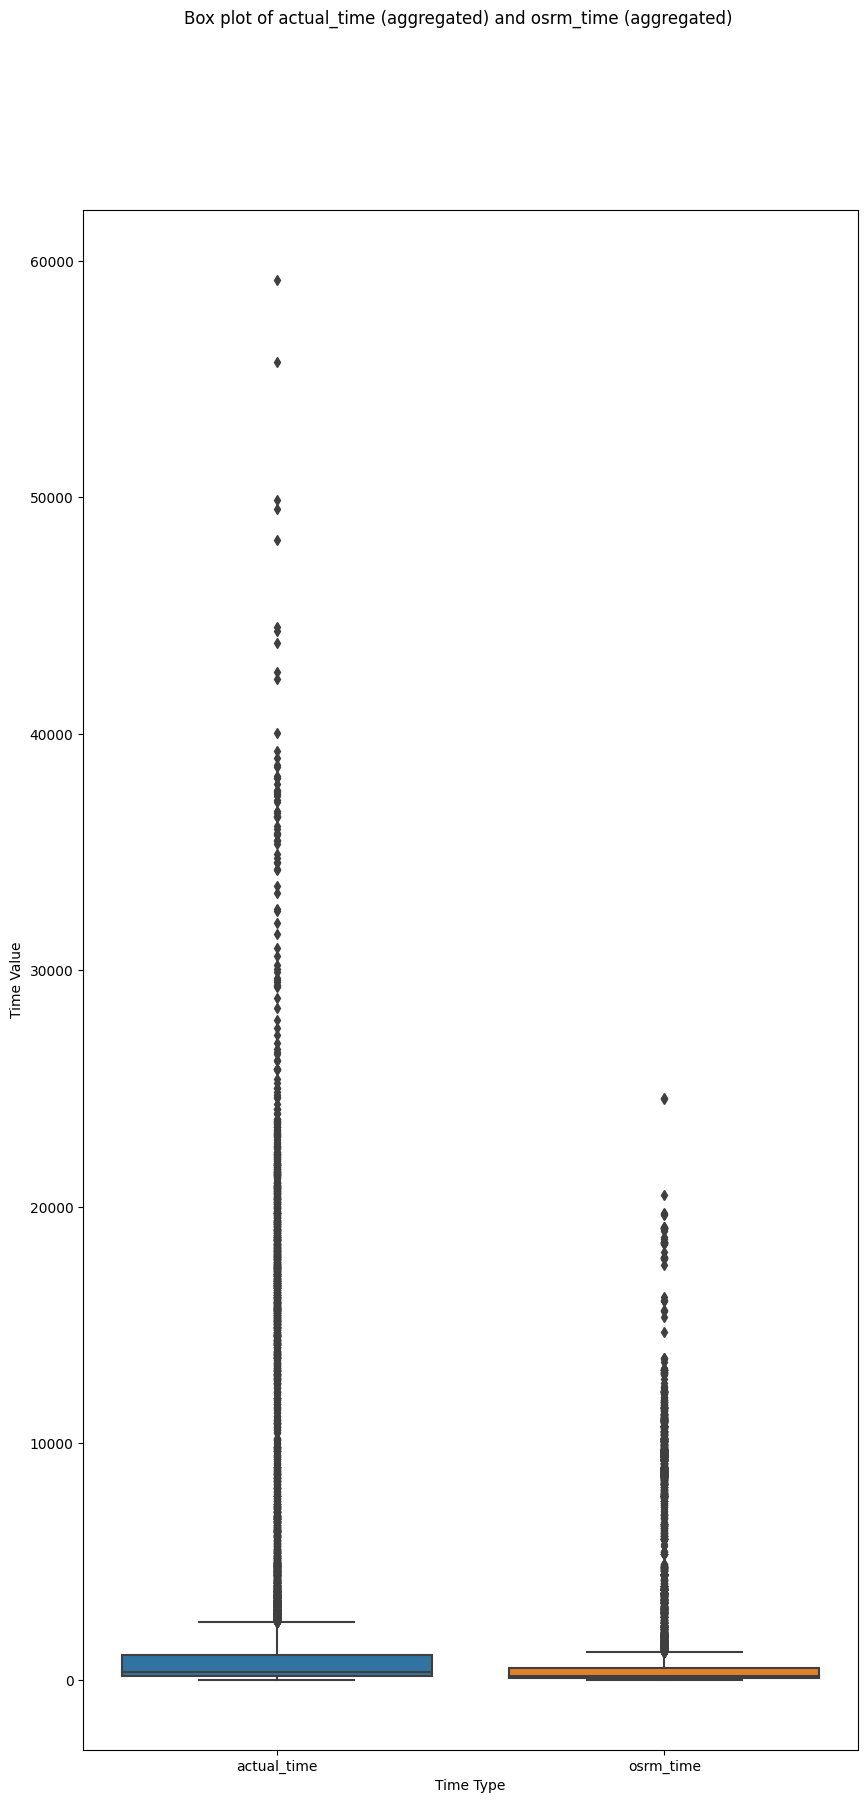

In [41]:
plt.figure(figsize = (10, 20))
sns.boxplot(x = "variable", y = "value", data = pd.melt(df_merged[["actual_time", "osrm_time"]]))
plt.suptitle("Box plot of actual_time (aggregated) and osrm_time (aggregated)")
plt.xlabel('Time Type')
plt.ylabel('Time Value')
plt.show()

## Comparison between actual_time (aggregated) and segment_actual_time (aggregated)

### Conducting a t-test to check for independence between actual_time (aggregated) and segment_actual_time (aggregated)

In [42]:
# setting the significance level (alpha value)
alpha = 0.05

In [43]:
# finding the mean of actual_time (aggregated) and segment_actual_time (aggregated)
print(f"Mean of actual_time (aggregated) = {np.mean(df_merged['actual_time'])}")
print(f"Mean of segment_actual_time (aggregated) = {np.mean(df_merged['segment_actual_time'])}")

Mean of actual_time (aggregated) = 1945.5525265507679
Mean of segment_actual_time (aggregated) = 304.86761821010623


In [44]:
# conducting the t-test independent to find is there is a significant difference between the two
t_stat, p_value = ttest_ind(df_merged["actual_time"], df_merged["segment_actual_time"])

print(f"T-Statistic: {t_stat}\nP-Value: {p_value}")

T-Statistic: 41.43712530550075
P-Value: 0.0


In [45]:
if p_value < alpha:
    print("Reject H0")
    print("There is a significant difference between actual_time (aggregated) and segment_actual_time (aggregated)")
else:
    print("Accept H0")
    print("There is no significant difference between actual_time (aggregated) and segment_actual_time (aggregated)")

Reject H0
There is a significant difference between actual_time (aggregated) and segment_actual_time (aggregated)


### Visual analysis between actual_time (aggregated) and segment_actual_time (aggregated)

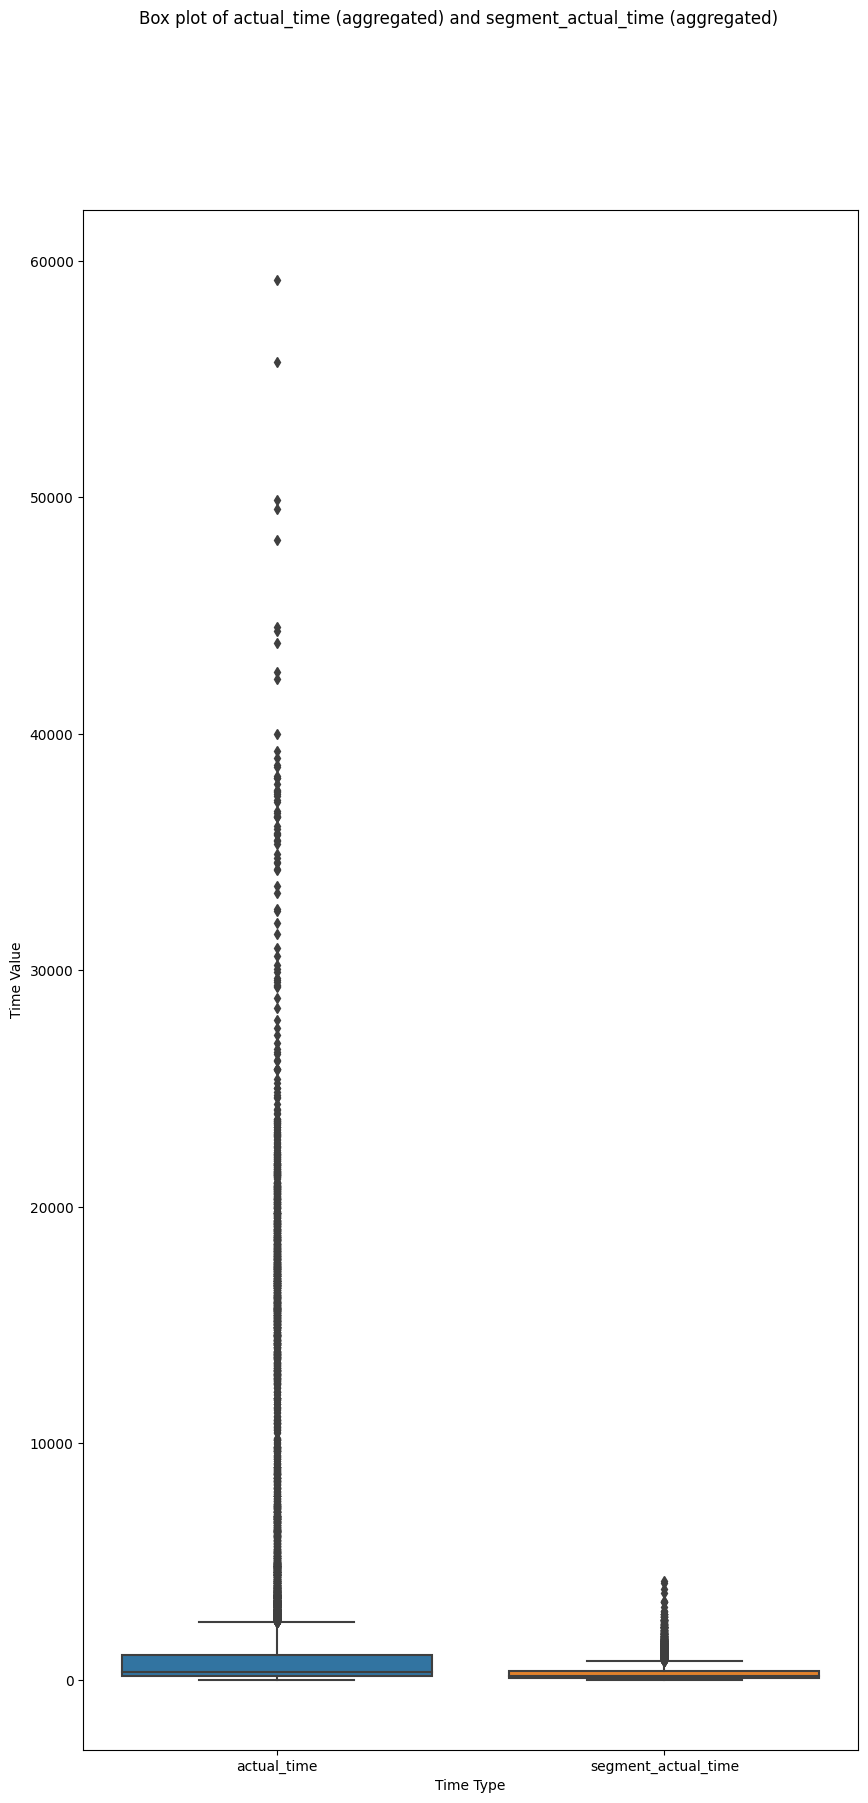

In [46]:
plt.figure(figsize = (10, 20))
sns.boxplot(x = "variable", y = "value", data = pd.melt(df_merged[["actual_time", "segment_actual_time"]]))
plt.suptitle("Box plot of actual_time (aggregated) and segment_actual_time (aggregated)")
plt.xlabel('Time Type')
plt.ylabel('Time Value')
plt.show()

## Comparison between osrm_distance (aggregated) and segment_osrm_distance (aggregated)

### Conducting a t-test to check for independence between osrm_distance (aggregated) and segment_osrm_distance (aggregated)

In [47]:
# setting the significance level (alpha value)
alpha = 0.05

In [48]:
# finding the mean of osrm_distance (aggregated) and segment_osrm_distance (aggregated)
print(f"Mean of osrm_distance (aggregated) = {np.mean(df['osrm_distance'])}")
print(f"Mean of segment_osrm_distance (aggregated) = {np.mean(df['segment_osrm_distance'])}")

Mean of osrm_distance (aggregated) = 149.28092811506906
Mean of segment_osrm_distance (aggregated) = 21.8397534704106


In [49]:
# conducting the t-test independent to find is there is a significant difference between the two
t_stat, p_value = ttest_ind(df_merged["osrm_distance"], df_merged["segment_osrm_distance"])

print(f"T-Statistic: {t_stat}\nP-Value: {p_value}")

T-Statistic: 39.84498233303886
P-Value: 0.0


In [50]:
if p_value < alpha:
    print("Reject H0")
    print("There is a significant difference between osrm_distance (aggregated) and segment_osrm_distance (aggregated)")
else:
    print("Accept H0")
    print("There is no significant difference between osrm_distance (aggregated) and segment_osrm_distance (aggregated)")

Reject H0
There is a significant difference between osrm_distance (aggregated) and segment_osrm_distance (aggregated)


### Visual analysis between osrm_distance (aggregated) and segment_osrm_distance (aggregated)

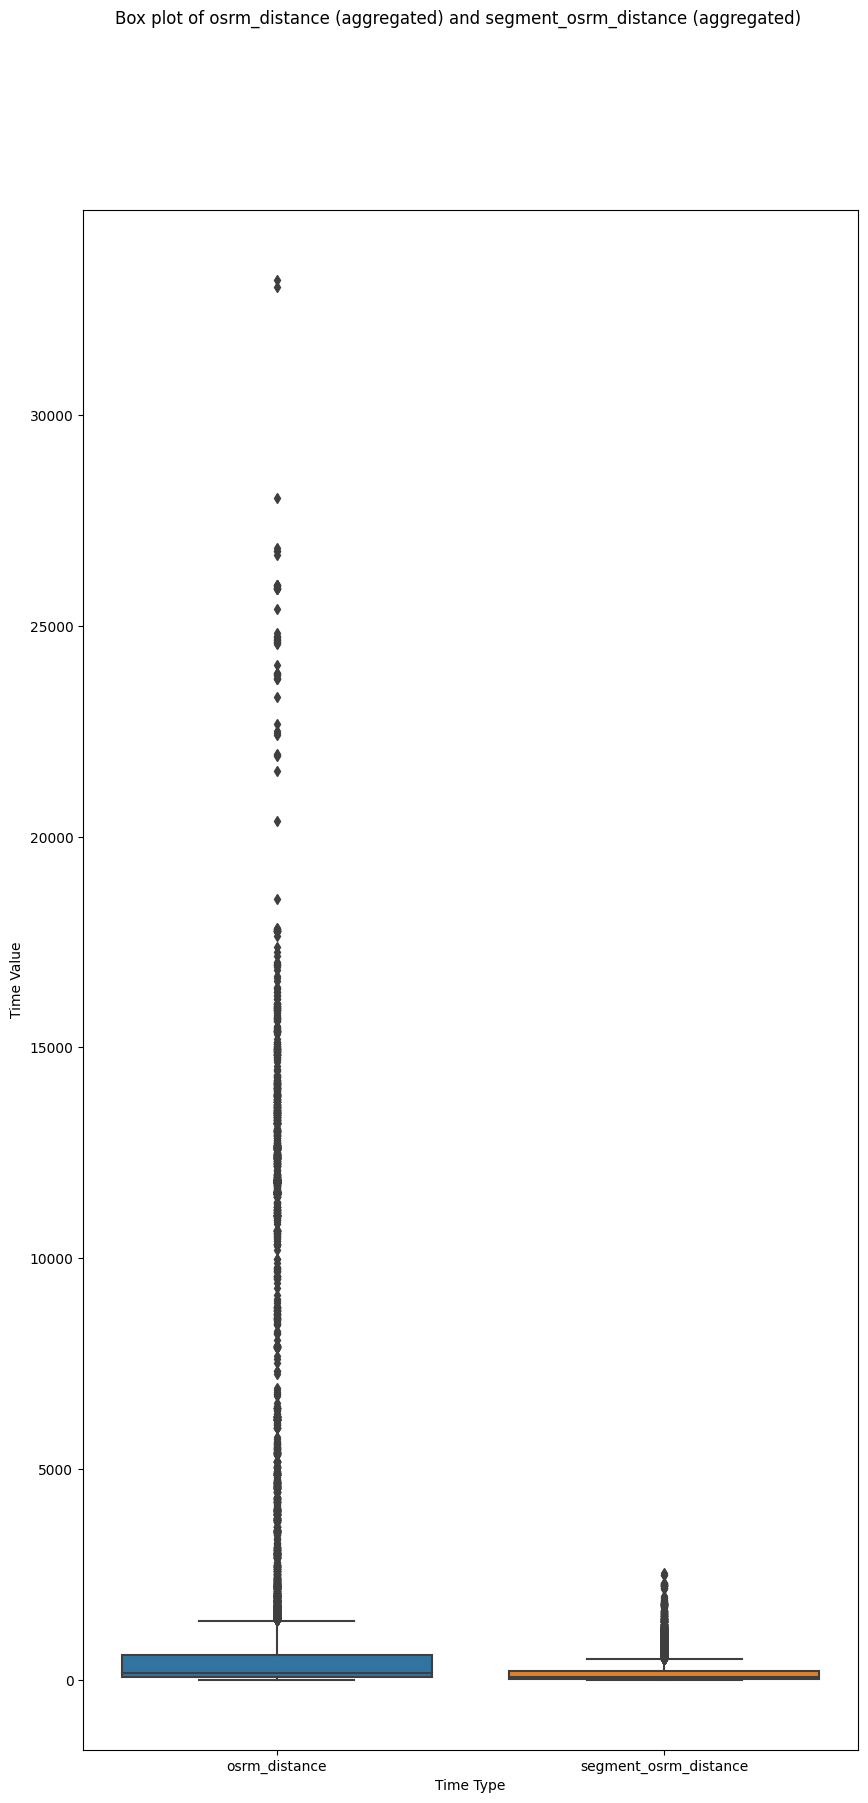

In [51]:
plt.figure(figsize = (10, 20))
sns.boxplot(x = "variable", y = "value", data = pd.melt(df_merged[["osrm_distance", "segment_osrm_distance"]]))
plt.suptitle("Box plot of osrm_distance (aggregated) and segment_osrm_distance (aggregated)")
plt.xlabel('Time Type')
plt.ylabel('Time Value')
plt.show()

## Comparison between osrm_time (aggregated) and segment_osrm_time (aggregated)

### Conducting a t-test to check for independence between osrm_time (aggregated) and segment_osrm_time (aggregated)

In [52]:
# setting the significance level (alpha value)
alpha = 0.05

In [53]:
# finding the mean of osrm_time (aggregated) and segment_osrm_time (aggregated)
print(f"Mean of osrm_time (aggregated) = {np.mean(df['osrm_time'])}")
print(f"Mean of segment_osrm_time (aggregated) = {np.mean(df['segment_osrm_time'])}")

Mean of osrm_time (aggregated) = 114.98597606286265
Mean of segment_osrm_time (aggregated) = 17.958608041233852


In [54]:
# conducting the t-test independent to find is there is a significant difference between the two
t_stat, p_value = ttest_ind(df_merged["osrm_time"], df_merged["segment_osrm_time"])

print(f"T-Statistic: {t_stat}\nP-Value: {p_value}")

T-Statistic: 40.68249104219868
P-Value: 0.0


In [55]:
if p_value < alpha:
    print("Reject H0")
    print("There is a significant difference between osrm_time (aggregated) and segment_osrm_time (aggregated)")
else:
    print("Accept H0")
    print("There is no significant difference between osrm_time (aggregated) and segment_osrm_time (aggregated)")

Reject H0
There is a significant difference between osrm_time (aggregated) and segment_osrm_time (aggregated)


### Visual analysis between osrm_time (aggregated) and segment_osrm_time (aggregated)

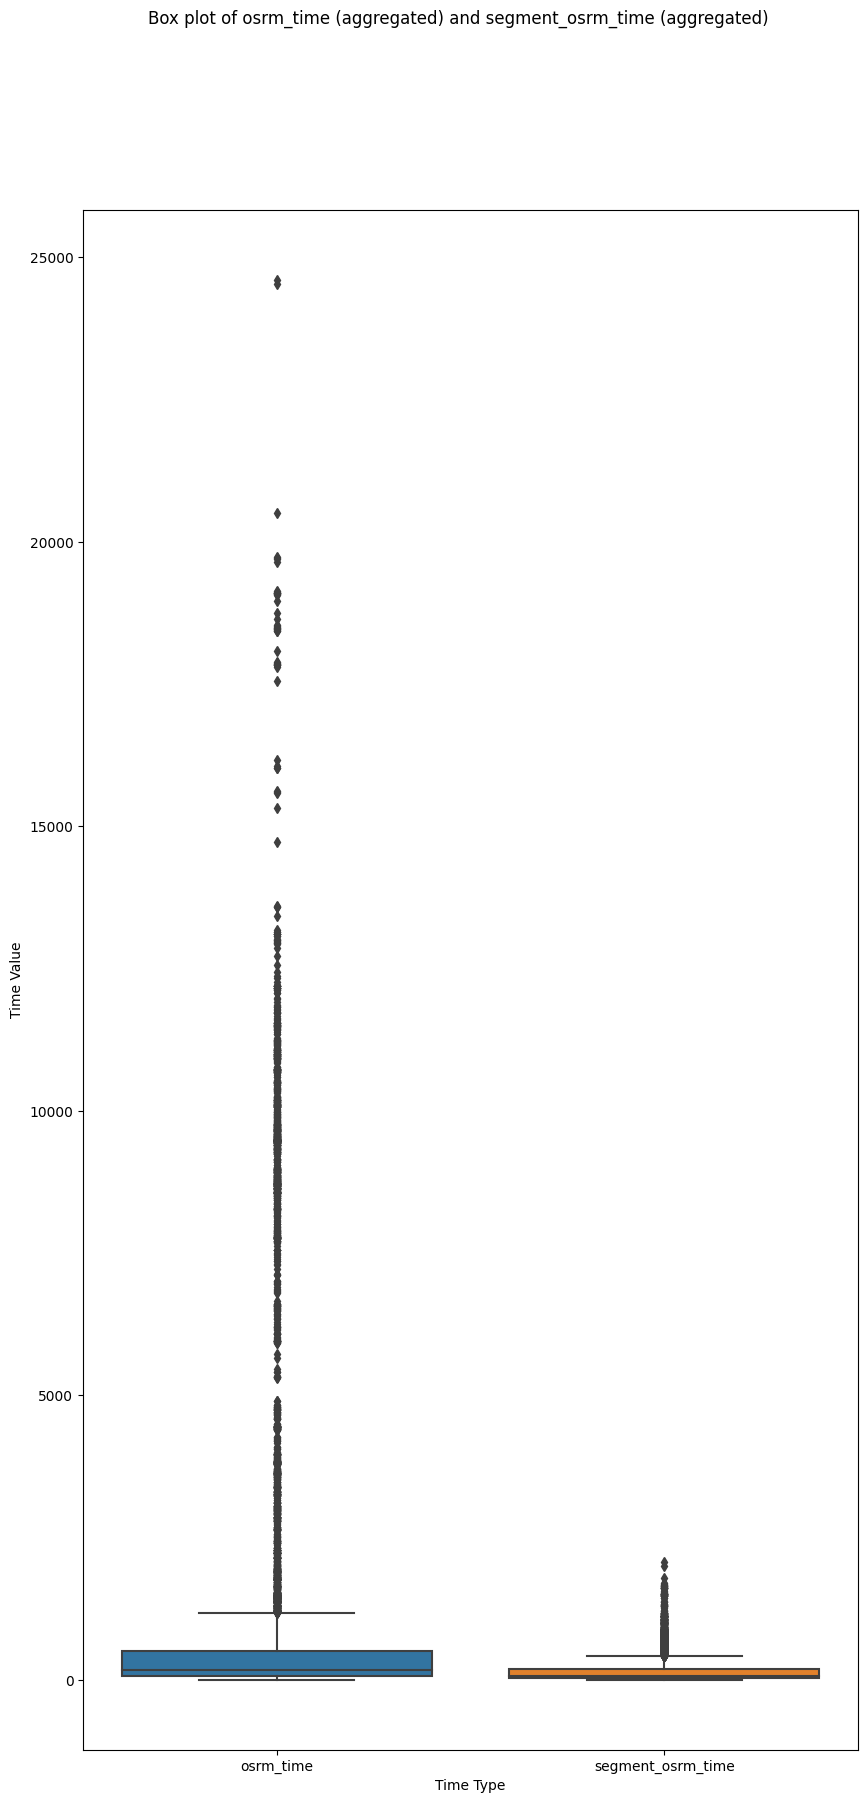

In [56]:
plt.figure(figsize = (10, 20))
sns.boxplot(x = "variable", y = "value", data = pd.melt(df_merged[["osrm_time", "segment_osrm_time"]]))
plt.suptitle("Box plot of osrm_time (aggregated) and segment_osrm_time (aggregated)")
plt.xlabel('Time Type')
plt.ylabel('Time Value')
plt.show()

# 5. Missing Values and Outliers Treatment

# 6. Checking Relationship between Aggregated Fields

In [57]:
# finding all the columns with numerical data
numerical_columns = df_merged.select_dtypes(include = ["float", "int"]).columns
numerical_columns

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'trip_creation_year',
       'trip_creation_month', 'trip_creation_day', 'trip_creation_hour',
       'trip_creation_minute', 'trip_creation_second',
       'time_taken_between_od_start_end'],
      dtype='object')

In [58]:
# tabulating the correlation matrix
correlation_matrix = df_merged[numerical_columns].corr()
correlation_matrix

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second,time_taken_between_od_start_end
start_scan_to_end_scan,1.000000,0.946160,0.947690,0.948246,0.947275,0.774388,0.836735,0.858335,NaN,0.003054,0.003315,0.003706,-0.011697,0.001791,1.000000
actual_distance_to_destination,0.946160,1.000000,0.979444,0.995891,0.997514,0.817320,0.903017,0.925452,NaN,0.000622,0.001147,0.006269,-0.011708,0.005565,0.946189
actual_time,0.947690,0.979444,1.000000,0.981097,0.982841,0.855943,0.899843,0.920106,NaN,-0.000861,0.003649,0.000773,-0.012682,0.008403,0.947716
osrm_time,0.948246,0.995891,0.981097,1.000000,0.999053,0.823337,0.915332,0.930947,NaN,-0.000266,0.001544,0.007684,-0.011987,0.005601,0.948276
osrm_distance,0.947275,0.997514,0.982841,0.999053,1.000000,0.822320,0.910206,0.929442,NaN,0.000642,0.001541,0.006247,-0.011671,0.005691,0.947304
segment_actual_time,0.774388,0.817320,0.855943,0.823337,0.822320,1.000000,0.907254,0.911890,NaN,-0.011562,0.007067,0.018552,-0.007223,0.018073,0.774448
segment_osrm_time,0.836735,0.903017,0.899843,0.915332,0.910206,0.907254,1.000000,0.991876,NaN,-0.009787,0.003974,0.029773,-0.006563,0.012246,0.836802
segment_osrm_distance,0.858335,0.925452,0.920106,0.930947,0.929442,0.911890,0.991876,1.000000,NaN,-0.007968,0.003365,0.026005,-0.007547,0.010157,0.858399
trip_creation_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_creation_month,0.003054,0.000622,-0.000861,-0.000266,0.000642,-0.011562,-0.009787,-0.007968,NaN,1.000000,-0.766868,0.013072,0.008532,0.009679,0.003052


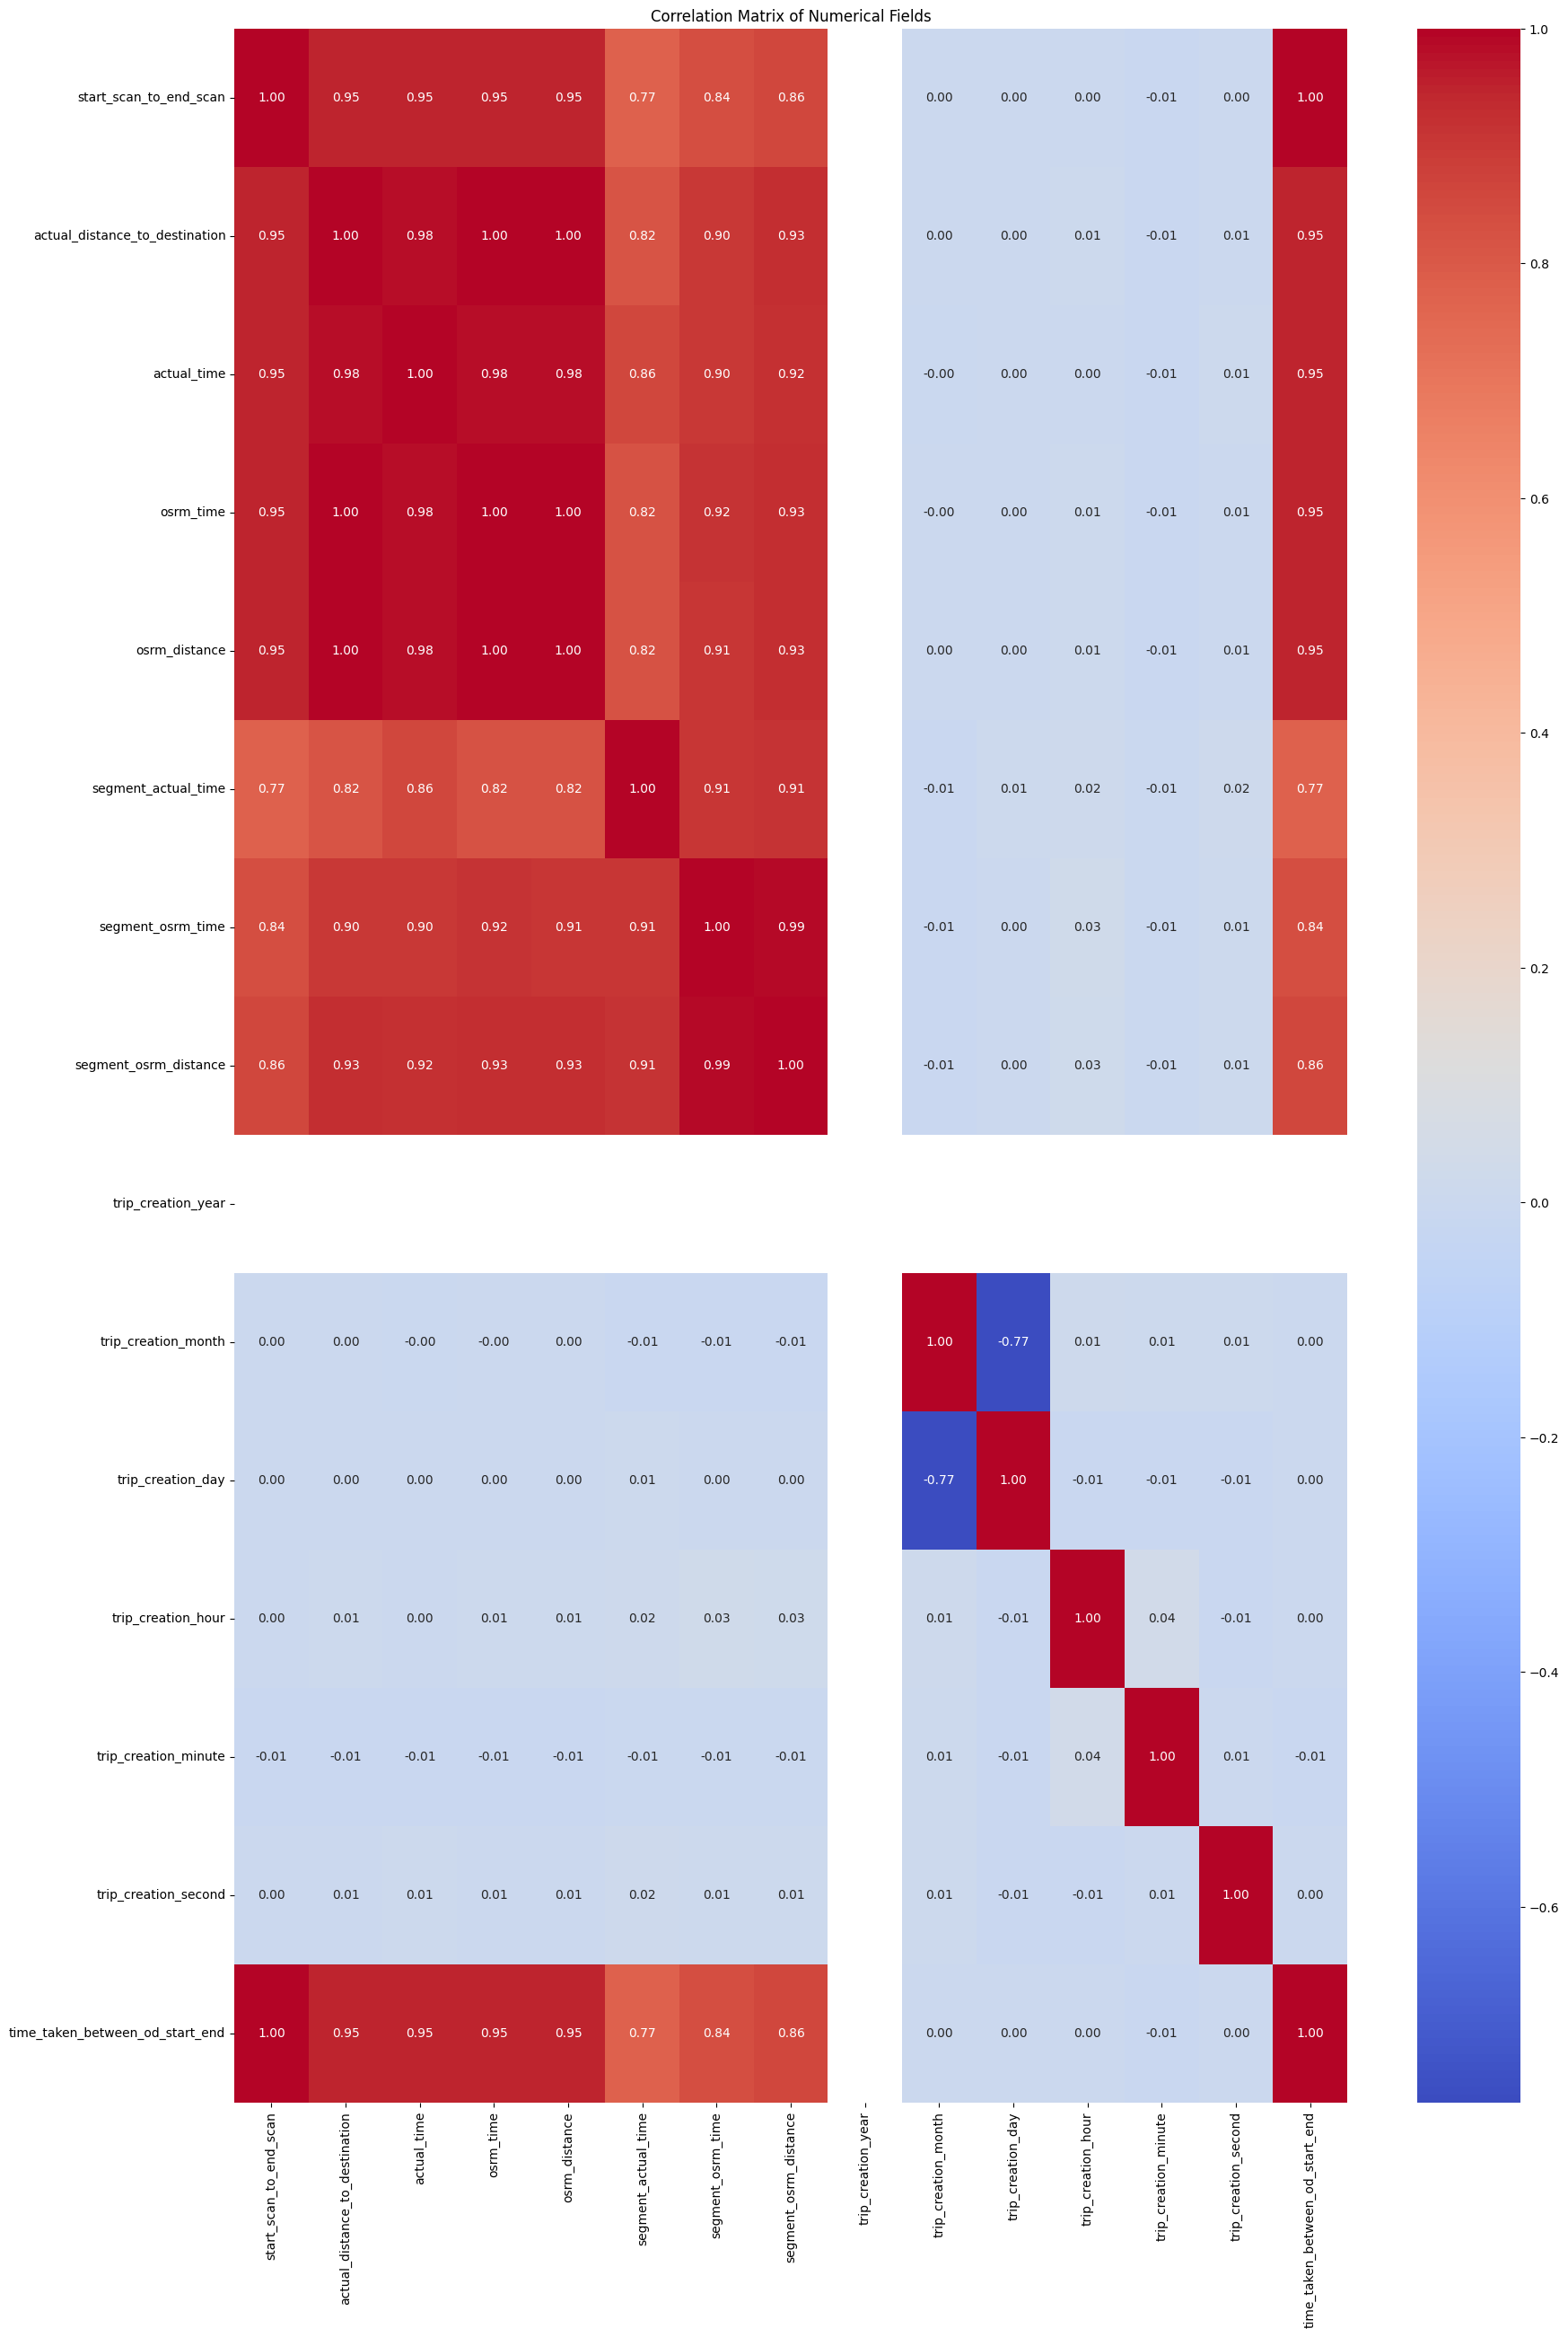

In [59]:
# plotting the correlation matix using a heatmap
plt.figure(figsize = (20, 30))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix of Numerical Fields")
plt.show()

# 7. Handling Categorical Values

# 8. Column Normalization/ Column Standardization

In [60]:
# creating a list of numerical columns
numerical_columns = df_merged.select_dtypes(include = ["float", "int"]).columns.tolist()
numerical_columns

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'trip_creation_year',
 'trip_creation_month',
 'trip_creation_day',
 'trip_creation_hour',
 'trip_creation_minute',
 'trip_creation_second',
 'time_taken_between_od_start_end']

In [61]:
# creating a dataframe with only the numerical columns
df_merged_numerical = df_merged[numerical_columns]
df_merged_numerical.head(10)

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second,time_taken_between_od_start_end
0,43659.0,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733,2018,9,12,0,0,16,2.620830e+06
1,906.0,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894,2018,9,12,0,0,22,5.479044e+04
2,102978.0,12118.702590,20213.0,12192.0,15989.1990,1674.0,973.0,1216.8736,2018,9,12,0,0,33,6.180442e+06
3,200.0,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766,2018,9,12,0,1,0,1.205939e+04
4,1586.0,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919,2018,9,12,0,2,9,9.532266e+04
5,249.0,34.407865,92.0,30.0,38.1953,60.0,23.0,28.0647,2018,9,12,0,2,34,1.508195e+04
6,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,2018,9,12,0,4,22,5.880338e+03
7,292.0,41.834857,122.0,65.0,54.2978,64.0,34.0,28.9203,2018,9,12,0,4,28,1.762061e+04
8,560.0,44.084712,306.0,50.0,53.8577,161.0,29.0,30.9358,2018,9,12,0,5,40,3.370128e+04
9,98.0,19.282605,35.0,16.0,19.9606,23.0,14.0,16.0860,2018,9,12,0,6,39,5.920007e+03


In [62]:
df_merged_numerical.shape

(14783, 15)

In [63]:
# MinMax scaling
minmax_scaler = MinMaxScaler()
df_merged_numerical_minmax_scaled = df_merged.copy()
df_merged_numerical_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(df_merged_numerical)
df_merged_numerical_minmax_scaled

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_state,source_city,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second,time_taken_between_od_start_end
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,Uttar Pradesh,Bhopal,Madhya Pradesh,0.0,0.0,0.379310,0.0,0.000000,0.271186,0.206216
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,Karnataka,Tumkur,Karnataka,0.0,0.0,0.379310,0.0,0.000000,0.372881,0.004189
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,...,Haryana,Bangalore,Karnataka,0.0,0.0,0.379310,0.0,0.000000,0.559322,0.486469
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,Maharashtra,Mumbai Hub (Maharashtra),Maharashtra,0.0,0.0,0.379310,0.0,0.016949,0.000000,0.000824
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 00:02:09.740725,...,Karnataka,Bellary,Karnataka,0.0,0.0,0.379310,0.0,0.033898,0.152542,0.007380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND140603AAA,Zirakpur_DC (Punjab),2018-10-03 23:55:56.258533,...,Punjab,Chandigarh,Punjab,0.0,1.0,0.068966,1.0,0.932203,0.949153,0.004029
14779,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,Haryana,FBD,Haryana,0.0,1.0,0.068966,1.0,0.966102,0.389831,0.000447
14780,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-03 23:57:44.429324,...,Uttar Pradesh,Kanpur,Uttar Pradesh,0.0,1.0,0.068966,1.0,0.966102,0.745763,0.005857
14781,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628801AAA,Eral_Busstand_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,Tamil Nadu,Tirunelveli,Tamil Nadu,0.0,1.0,0.068966,1.0,1.000000,0.237288,0.006112


In [64]:
# standard scaling
standard_scaler = StandardScaler()
df_merged_numerical_standard_scaled = df_merged.copy()
df_merged_numerical_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df_merged_numerical)
df_merged_numerical_standard_scaled

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,destination_state,source_city,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second,time_taken_between_od_start_end
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,Uttar Pradesh,Bhopal,Madhya Pradesh,0.0,-0.369516,-0.808686,-1.560056,-1.716054,-0.799462,2.155985
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,Karnataka,Tumkur,Karnataka,0.0,-0.369516,-0.808686,-1.560056,-1.716054,-0.453227,-0.305629
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,...,Haryana,Bangalore,Karnataka,0.0,-0.369516,-0.808686,-1.560056,-1.716054,0.181537,5.570739
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,Maharashtra,Mumbai Hub (Maharashtra),Maharashtra,0.0,-0.369516,-0.808686,-1.560056,-1.658568,-1.722756,-0.346621
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 00:02:09.740725,...,Karnataka,Bellary,Karnataka,0.0,-0.369516,-0.808686,-1.560056,-1.601082,-1.203403,-0.266747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND140603AAA,Zirakpur_DC (Punjab),2018-10-03 23:55:56.258533,...,Punjab,Chandigarh,Punjab,0.0,2.706245,-1.950403,1.319884,1.445672,1.508772,-0.307577
14779,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,Haryana,FBD,Haryana,0.0,2.706245,-1.950403,1.319884,1.560644,-0.395521,-0.351215
14780,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-03 23:57:44.429324,...,Uttar Pradesh,Kanpur,Uttar Pradesh,0.0,2.706245,-1.950403,1.319884,1.560644,0.816302,-0.285301
14781,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628801AAA,Eral_Busstand_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,Tamil Nadu,Tirunelveli,Tamil Nadu,0.0,2.706245,-1.950403,1.319884,1.675616,-0.914874,-0.282190


In [65]:
# statistical summary of the minmax scaled data
df_merged_numerical_minmax_scaled.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second,time_taken_between_od_start_end
count,14783,14783,14783,14783.000000,14783.000000,14783.000000,14783.000000,14783.000000,14783.000000,14783.000000,14783.000000,14783.0,14783.000000,14783.000000,14783.000000,14783.000000,14783.000000,14783.000000
mean,2018-09-22 12:27:30.504612608,2018-09-22 13:26:57.421771776,2018-09-22 22:32:19.240515840,0.029258,0.041944,0.032718,0.039757,0.038199,0.071259,0.071616,0.070141,0.0,0.120138,0.599129,0.541697,0.505961,0.506002,0.029272
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-09-17 02:38:18.128431872,2018-09-17 04:01:43.915365632,2018-09-17 14:32:42.077968640,0.001795,0.001636,0.002247,0.002236,0.001703,0.013728,0.011639,0.009266,0.0,0.000000,0.448276,0.173913,0.254237,0.254237,0.001802
50%,2018-09-22 03:40:56.780150016,2018-09-22 04:30:00.555500032,2018-09-22 15:32:09.350953984,0.004507,0.005036,0.005694,0.006505,0.004933,0.032996,0.028613,0.023933,0.0,0.000000,0.620690,0.608696,0.508475,0.508475,0.004515
75%,2018-09-27 19:23:55.947142400,2018-09-27 19:47:28.805705472,2018-09-28 04:19:34.077736960,0.013172,0.018191,0.017723,0.020489,0.017904,0.085381,0.086324,0.081697,0.0,0.000000,0.827586,0.869565,0.762712,0.762712,0.013192
max,2018-10-03 23:59:42.701692,2018-10-04 20:15:07.233819,2018-10-08 03:00:24.353479,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,NaN,NaN,0.082066,0.110709,0.081070,0.100501,0.099869,0.093445,0.103649,0.110061,0.0,0.325134,0.271832,0.347241,0.294850,0.293726,0.082074


In [66]:
# statistical summary of the standard scaled data
df_merged_numerical_standard_scaled.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_minute,trip_creation_second,time_taken_between_od_start_end
count,14783,14783,14783,1.478300e+04,1.478300e+04,1.478300e+04,1.478300e+04,1.478300e+04,1.478300e+04,1.478300e+04,1.478300e+04,14783.0,1.478300e+04,1.478300e+04,1.478300e+04,1.478300e+04,1.478300e+04,1.478300e+04
mean,2018-09-22 12:27:30.504612608,2018-09-22 13:26:57.421771776,2018-09-22 22:32:19.240515840,5.767782e-18,-4.085513e-17,-1.562108e-17,1.441946e-17,-1.538075e-17,-6.921339e-17,4.277772e-17,4.421967e-17,0.0,-2.768536e-16,-1.076653e-16,4.998745e-17,-4.037448e-17,4.325837e-18,-4.421967e-17
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,-3.565241e-01,-3.788844e-01,-4.035916e-01,-3.955962e-01,-3.825057e-01,-7.626020e-01,-6.909657e-01,-6.373130e-01,0.0,-3.695157e-01,-2.204118e+00,-1.560056e+00,-1.716054e+00,-1.722756e+00,-3.566648e-01
25%,2018-09-17 02:38:18.128431872,2018-09-17 04:01:43.915365632,2018-09-17 14:32:42.077968640,-3.346474e-01,-3.641103e-01,-3.758735e-01,-3.733475e-01,-3.654533e-01,-6.156839e-01,-5.786680e-01,-5.531229e-01,0.0,-3.695157e-01,-5.549705e-01,-1.059197e+00,-8.537649e-01,-8.571678e-01,-3.347135e-01
50%,2018-09-22 03:40:56.780150016,2018-09-22 04:30:00.555500032,2018-09-22 15:32:09.350953984,-3.016020e-01,-3.333985e-01,-3.333584e-01,-3.308726e-01,-3.331105e-01,-4.094830e-01,-4.149007e-01,-4.198530e-01,0.0,-3.695157e-01,7.931706e-02,1.929509e-01,8.523922e-03,8.419909e-03,-3.016522e-01
75%,2018-09-27 19:23:55.947142400,2018-09-27 19:47:28.805705472,2018-09-28 04:19:34.077736960,-1.960180e-01,-2.145679e-01,-1.849724e-01,-1.917169e-01,-2.032253e-01,1.511256e-01,1.419084e-01,1.050026e-01,0.0,-3.695157e-01,8.404622e-01,9.442396e-01,8.708128e-01,8.740076e-01,-1.959319e-01
max,2018-10-03 23:59:42.701692,2018-10-04 20:15:07.233819,2018-10-08 03:00:24.353479,1.182917e+01,8.654121e+00,1.193183e+01,9.554846e+00,9.630995e+00,9.939224e+00,8.957272e+00,8.448903e+00,0.0,2.706245e+00,1.474750e+00,1.319884e+00,1.675616e+00,1.681889e+00,1.182787e+01
std,NaN,NaN,NaN,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,0.0,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00


# 9. Business Insights

### Top 10 cities where most of the orders were picked up from

In [67]:
top_10_source_cities = df_merged["source_city"].value_counts().head(10)
print("Top 10 Source Cities:")
top_10_source_cities

Top 10 Source Cities:


source_city
Bengaluru     1015
Gurgaon       1011
Bhiwandi       811
Bangalore      754
Delhi          615
Mumbai         579
Hyderabad      562
Pune           445
Chandigarh     417
Kolkata        339
Name: count, dtype: int64

### Top 10 cities where most of the orders were delivered to

In [68]:
top_10_destination_cities = df_merged["destination_city"].value_counts().head(10)
print("Top 10 Destination Cities:")
top_10_destination_cities

Top 10 Destination Cities:


destination_city
Bengaluru    1122
Mumbai        923
Gurgaon       842
Delhi         509
Bangalore     503
Hyderabad     426
Chennai       413
Bhiwandi      394
Pune          289
Sonipat       278
Name: count, dtype: int64

### Popular route_type

In [69]:
popular_route_type = df_merged["route_type"].value_counts()
popular_route_type

route_type
Carting    8906
FTL        5877
Name: count, dtype: int64

### Number of orders by year

In [70]:
number_of_orders_by_year = df_merged["trip_creation_year"].value_counts()
number_of_orders_by_year

trip_creation_year
2018    14783
Name: count, dtype: int64

### Number of orders by month

In [71]:
number_of_orders_by_month = df_merged["trip_creation_month"].value_counts()
number_of_orders_by_month

trip_creation_month
9     13007
10     1776
Name: count, dtype: int64

### Number of orders by day

In [72]:
number_of_orders_by_day = df_merged["trip_creation_day"].value_counts()
number_of_orders_by_day

trip_creation_day
18    791
15    783
13    750
12    747
21    740
22    738
17    722
14    712
20    703
25    695
26    683
19    673
24    658
27    650
23    631
3     627
16    615
28    605
29    605
1     600
2     549
30    506
Name: count, dtype: int64

### Highest 10 distances between source city and destination city

In [73]:
highest_10_distances = df_merged.nlargest(10, "actual_distance_to_destination")[["actual_distance_to_destination", "source_city", "destination_city"]].reset_index()
highest_10_distances.drop(columns = ["index"], inplace = True)
highest_10_distances

,actual_distance_to_destination,source_city,destination_city
0,24817.325158,MAA,Hyderabad
1,24760.482147,MAA,Hyderabad
2,22655.508376,Gurgaon,Muzaffrpur
3,22652.158265,Gurgaon,Muzaffrpur
4,22646.895830,Gurgaon,Muzaffrpur
5,22639.982657,Gurgaon,Muzaffrpur
6,21979.397506,Gurgaon,Muzaffrpur
7,21979.258597,Gurgaon,Muzaffrpur
8,21978.368478,Gurgaon,Muzaffrpur
9,21975.578659,Gurgaon,Muzaffrpur


### Top 10 states from where the orders were picked up from

In [74]:
top_10_source_states = df["source_state"].value_counts().head(10)
top_10_source_states

source_state
Haryana           19052
Maharashtra       18960
Karnataka         16038
Tamil Nadu         7494
Uttar Pradesh      7086
Gujarat            6567
Telangana          6329
Andhra Pradesh     5539
West Bengal        5413
Rajasthan          5230
Name: count, dtype: int64

### Top 10 states where the orders were delivered to

In [75]:
top_10_destination_states = df["destination_state"].value_counts().head(10)
top_10_destination_states

destination_state
Karnataka         17024
Maharashtra       16434
Haryana           16145
Uttar Pradesh      7757
Tamil Nadu         7436
Telangana          7436
Gujarat            6578
West Bengal        6508
Andhra Pradesh     5845
Rajasthan          5717
Name: count, dtype: int64

### Top 10 busiest routes

In [76]:
top_10_routes = df_merged.groupby(["source_city", "destination_city"]).size().reset_index(name='route_count').nlargest(10, 'route_count').reset_index()
top_10_routes.drop(columns = ["index"], inplace = True)
top_10_routes

,source_city,destination_city,route_count
0,Bengaluru,Bengaluru,528
1,Bangalore,Bengaluru,492
2,Bhiwandi,Mumbai,407
3,Bengaluru,Bangalore,336
4,Hyderabad,Hyderabad,308
5,Delhi,Gurgaon,248
6,Gurgaon,Delhi,237
7,Mumbai Hub (Maharashtra),Mumbai,227
8,Mumbai,Mumbai,221
9,Mumbai,Bhiwandi,207


### Average time consumed in the top 10 routes

In [77]:
top_10_routes_data = pd.merge(top_10_routes, df_merged, on = ["source_city", "destination_city"], how = "inner")

# calculating to average time comsumed for top 10 routes
average_time_top_10_routes = top_10_routes_data["actual_time"].mean()
print(f"Average time consumed in the top 10 busiest routes:\n{average_time_top_10_routes}")

Average time consumed in the top 10 busiest routes:
561.8159451884148


### Average distance between the top 10 routes

In [78]:
average_distance_top_10_routes = top_10_routes_data["actual_distance_to_destination"].mean()
print(f"The average distance between the top 10 busiest routes = {average_distance_top_10_routes}")

The average distance between the top 10 busiest routes = 280.33014291229597


# 10. Recommendations

#### 1. Optimize route planning: 
The route planning can be further optimized. This could involve considering alternative routes, adjusting departure and arrival times, or improving the overall efficiency of the transportation process.
#### 2. Efficiency improvement: 
There might be an oppurtuinity to improve the efficiency of the transportation process. This could involve optimizing the actual travel path, considering traffic conditions, or making adjustments to the overall logistics strategy.
#### 3. Consider the osrm_time and osrm_distance together: 
As osrm_time and osrm_distance are highly correlated, analyzing these segments could provide insights into patters or specific areas where travel times and distance are consistently related. This information can be valuable for targeted improvements or adjustments in those segments.
#### 4. Review the un-correlated variables: 
The lack of correlation between a couple of variables suggests that these variables might be influenced by other different factors. It's worth investigating why these variables are uncorrelated and whether there are any specific conditions or scenarios where they might might become correlated.
#### 5. Optimize segments with high correlation: 
For segments with high correlation, focusing on optimizing these segments could lead to more significant improvements in overall transportation efficiency.
#### 6. Outlier management: 
Develop strategies for handling outliers in the data. Outliers could be a result of data entry errors, exceptional cases, or indicative of areas that require specific attention. Understanding the nature of outliers will guide appropriate actions, such as data cleansing or targeted process improvements.
#### 7. Continous monitoring: 
Establish a system for countinous monitoring of these variables over time. Changes in patterns or the emergence of new outliers could provide early indications of evolving challenges in the transportation process.
#### 8. Investigate the significant differences between different variables: 
Investigation of the said differences will help in understand the disproportions in the differences, understand the factors that are contributing to the differences which are a result of it, identification of the area which need improvement or optimization, and finally improving or optimization of the areas found.
This part will especially help in reducing the differences between the actual and osrm variable and there by help in improving the OSRM model.
#### 10. Establish a countinous monitoring system: 
Establishing a countinous monitoring system to observe the different variable over time will help in recognizing patterns or emergence of new outliers that could provide indications of evolving challenges in the transportation system.